# Global measures distributions for each snapshot individualy, separated for treatments

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import fileio

path = r"/home/milky/drosophila-SNA/data/results/global_measures_snapshots/120_sec_window/"
all_treatments = fileio.load_multiple_folders(path)

dataframes = []
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_files_from_folder(treatment_path)
    treatment_dataframes = []
    for group_name, group_path in all_groups.items():
        df = pd.read_csv(group_path, index_col=0)  # Load DataFrame from CSV (adjust if using a different file format)
        df['Group'] = group_name  # Assign group name to a new column
        treatment_dataframes.append(df)  # Add DataFrame to the list

    combined_df = pd.concat(treatment_dataframes)
    combined_df = combined_df.set_index(['Group'], append=True)
    combined_df.index.names = ['Snapshot', 'Group']
    combined_df = combined_df.reorder_levels(['Group', 'Snapshot'])  # Reorder the index levels
    combined_df['Treatment'] = treatment_name  # Add a new index level for Treatment
    combined_df = combined_df.set_index('Treatment', append=True)
    dataframes.append(combined_df)

combined_data = pd.concat(dataframes)

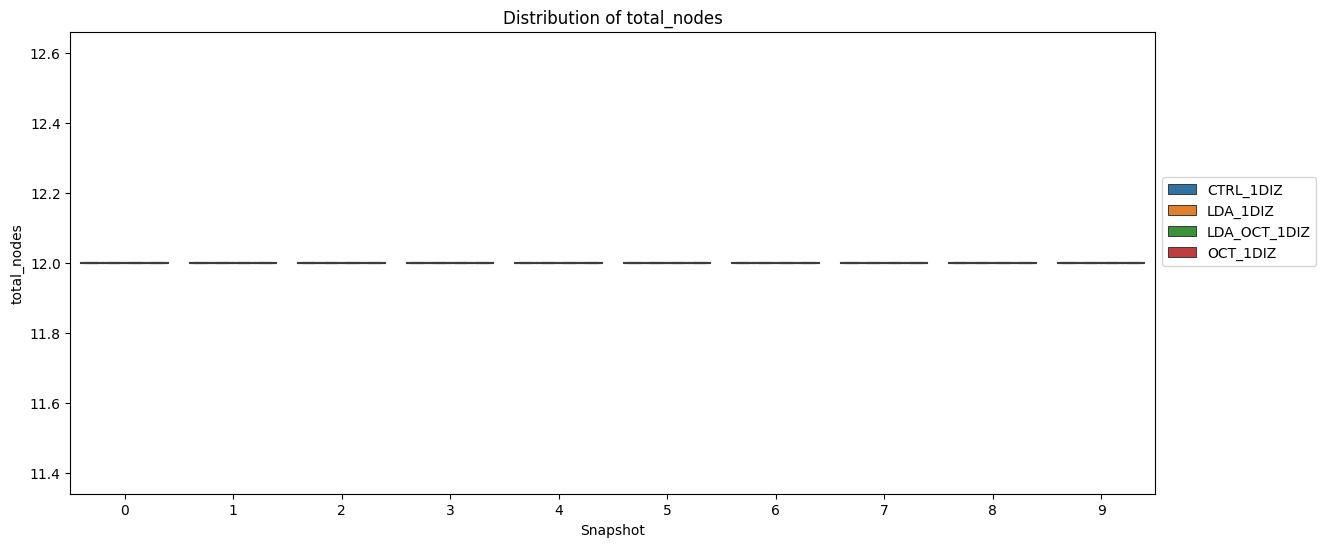

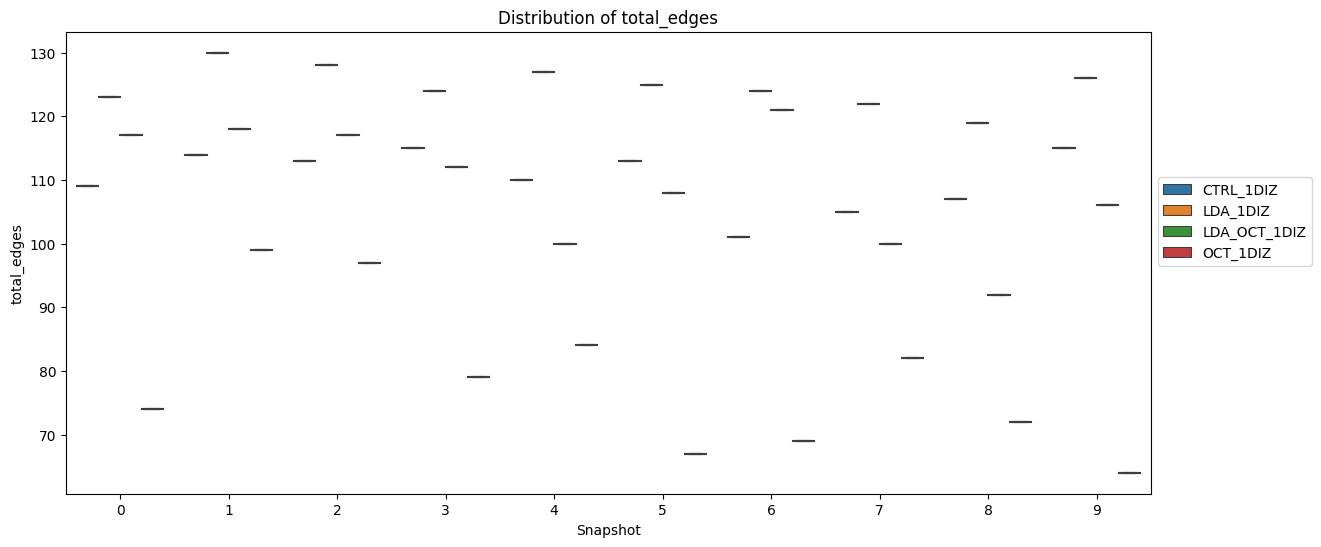

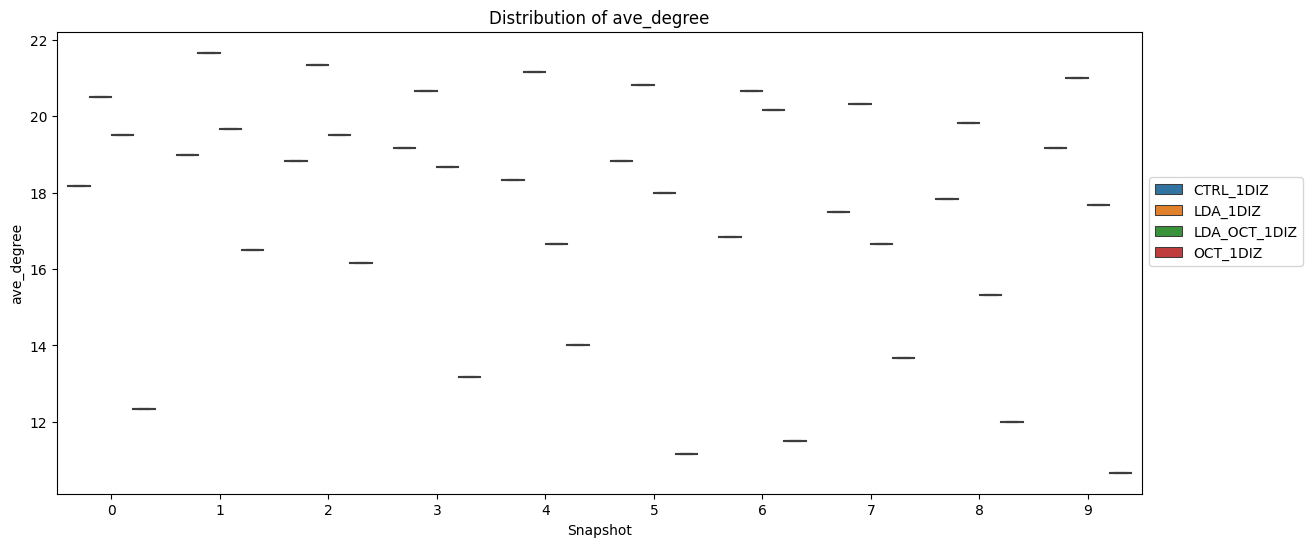

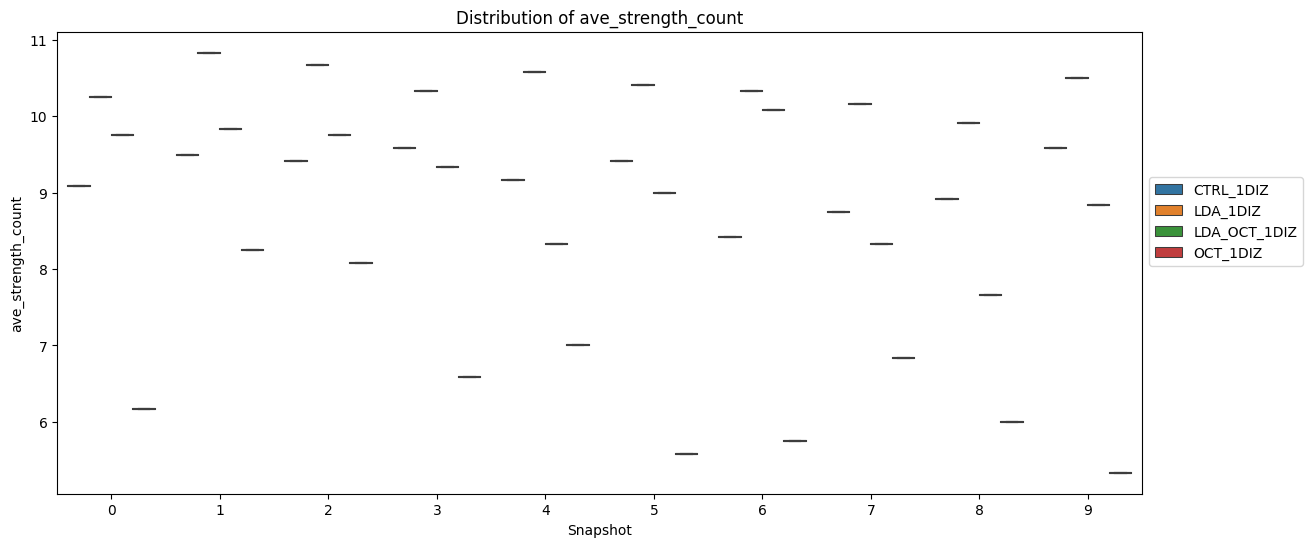

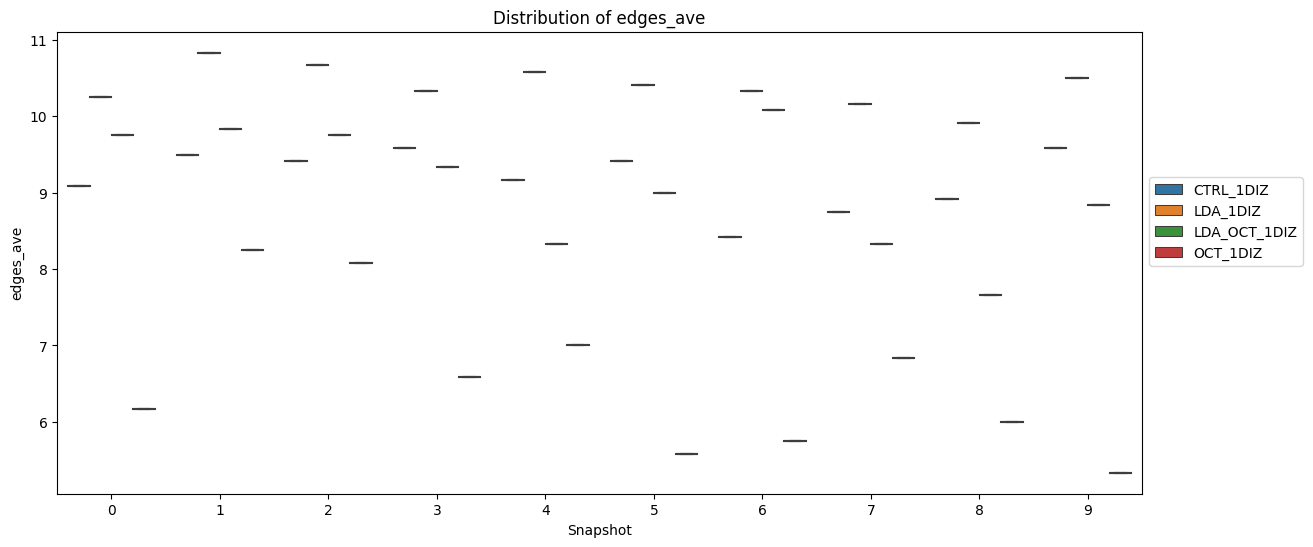

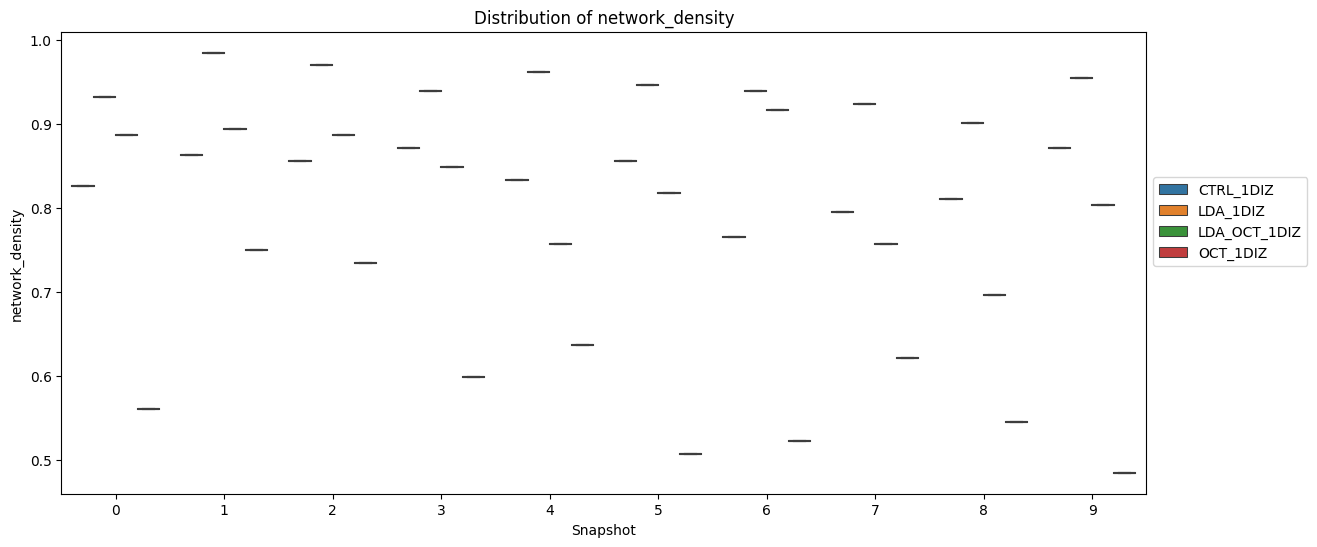

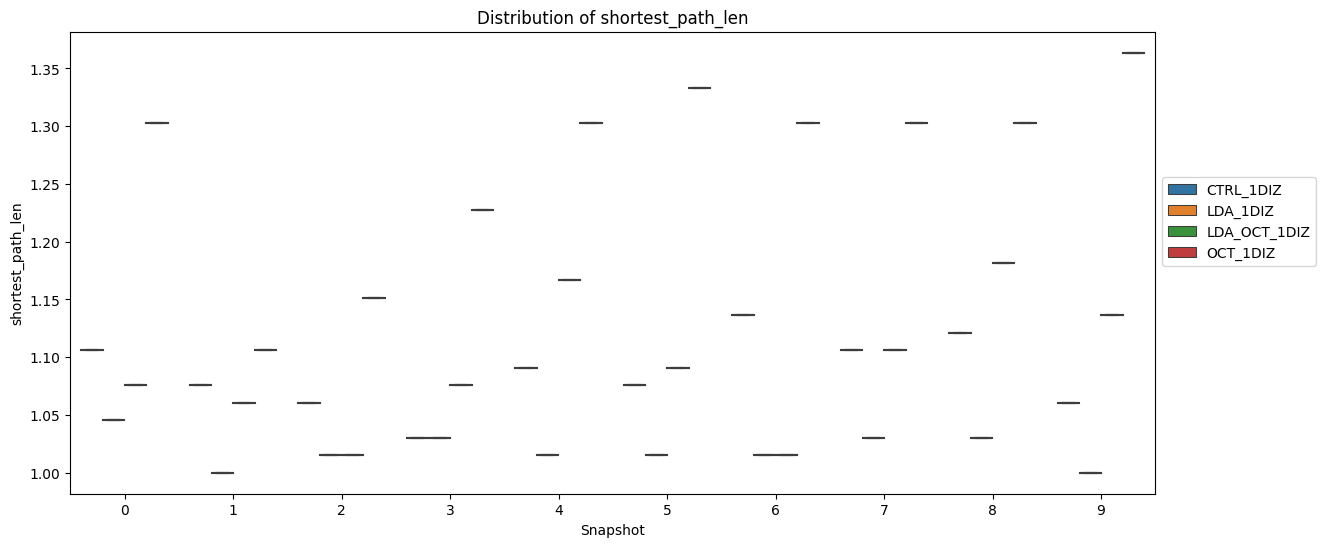

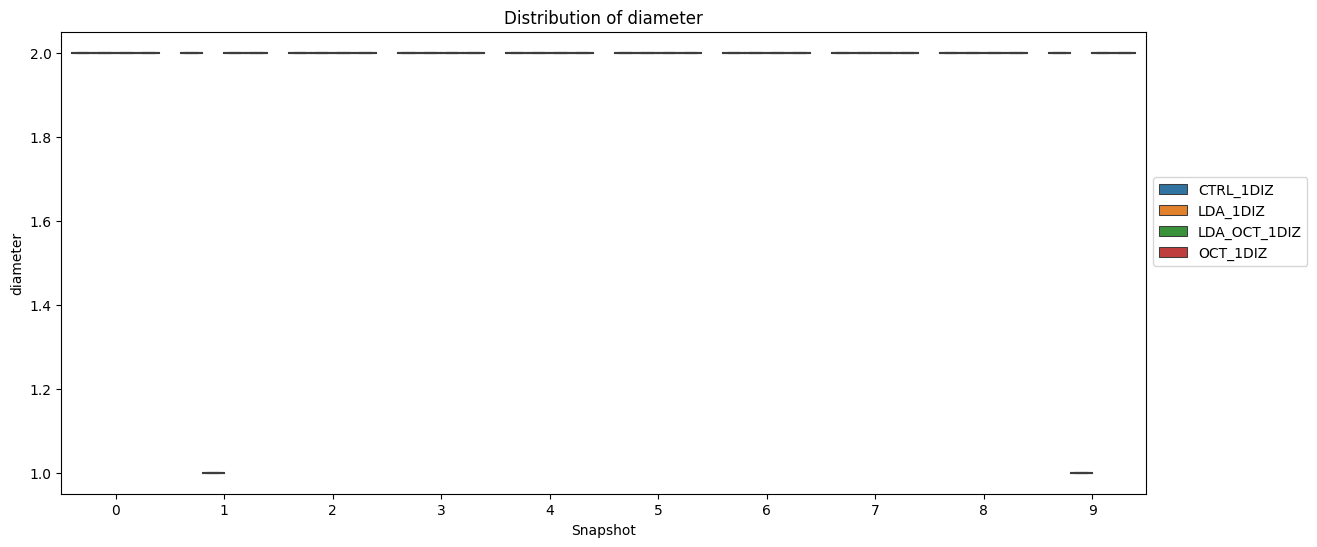

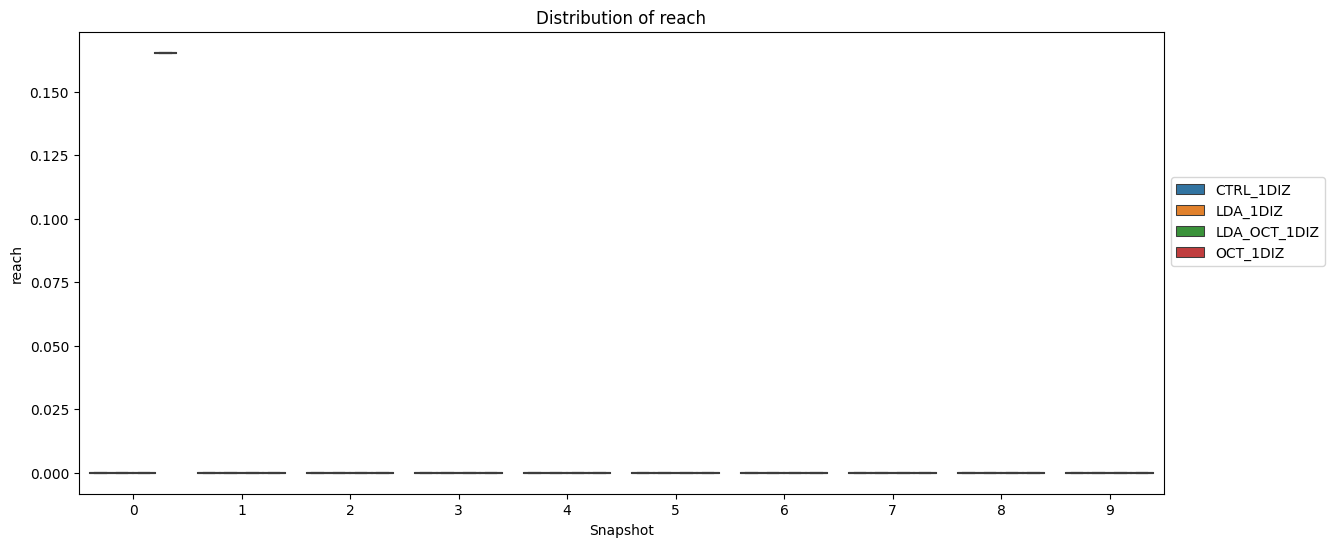

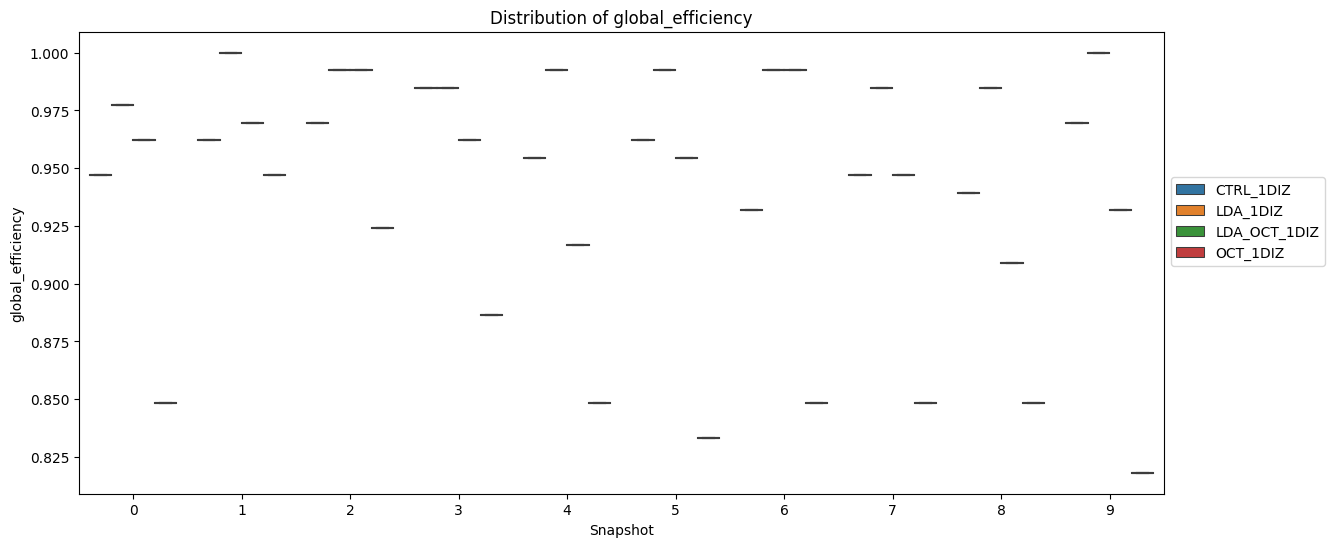

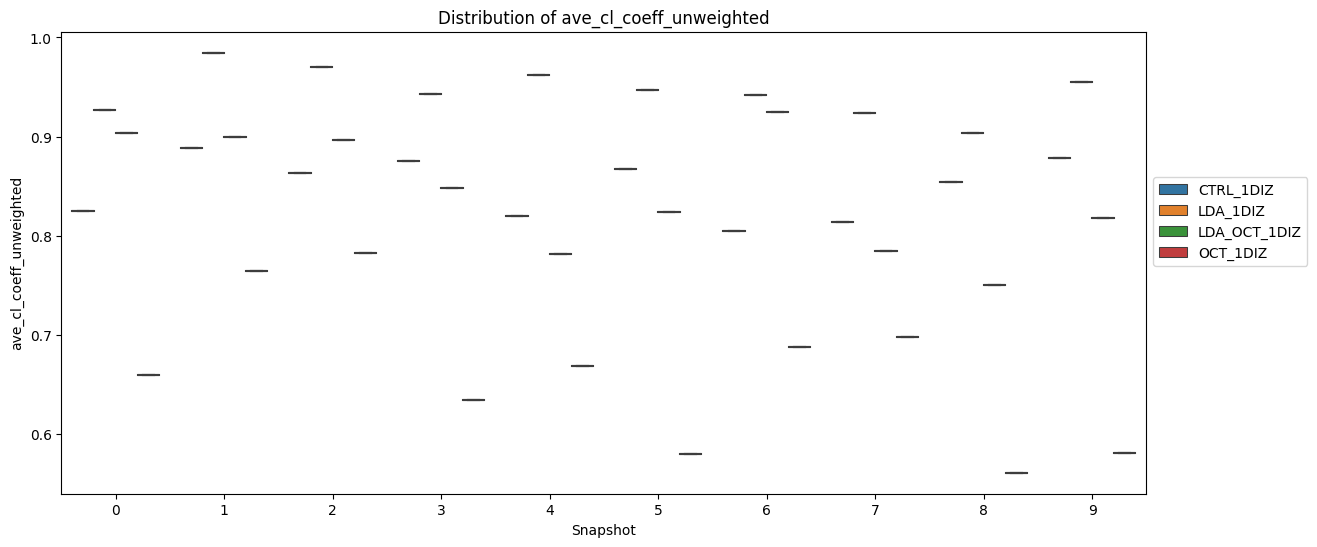

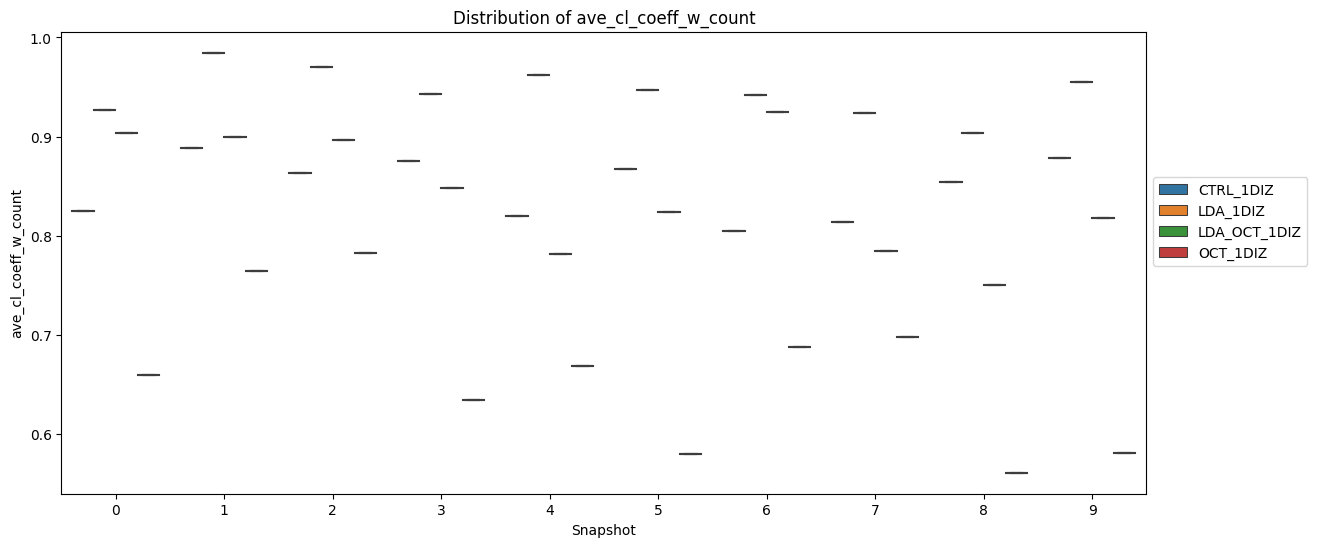

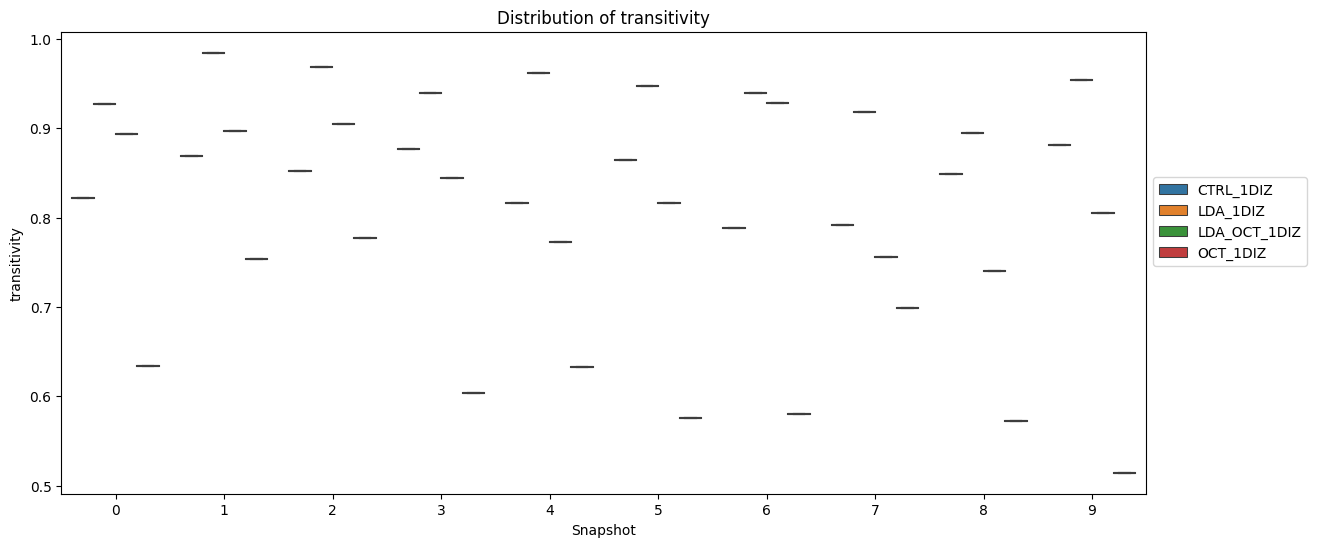

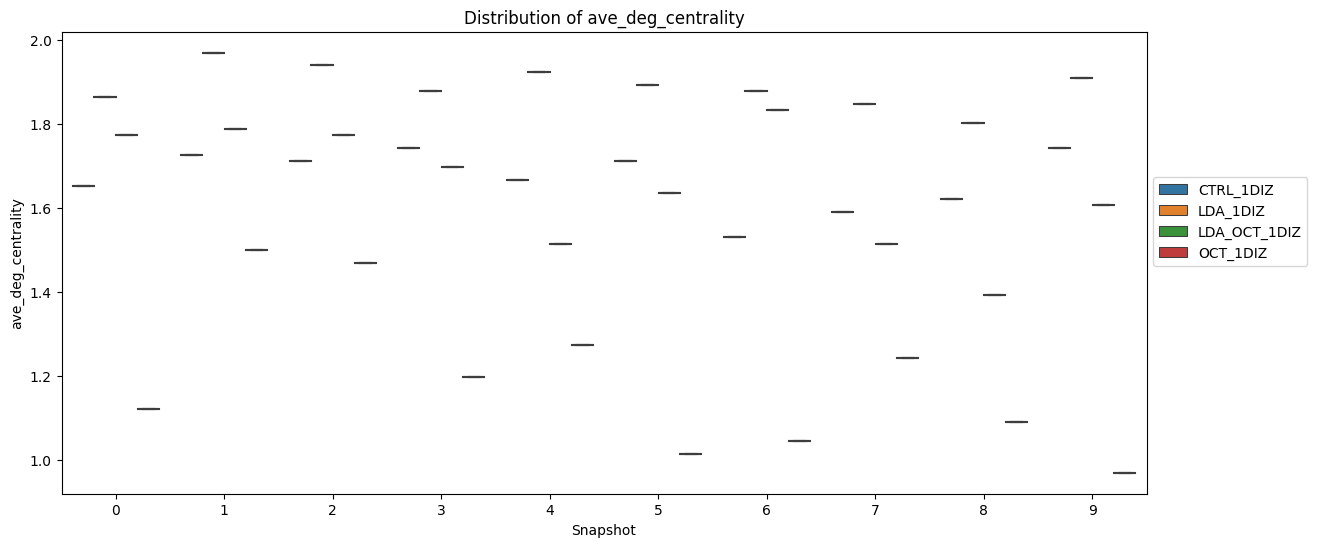

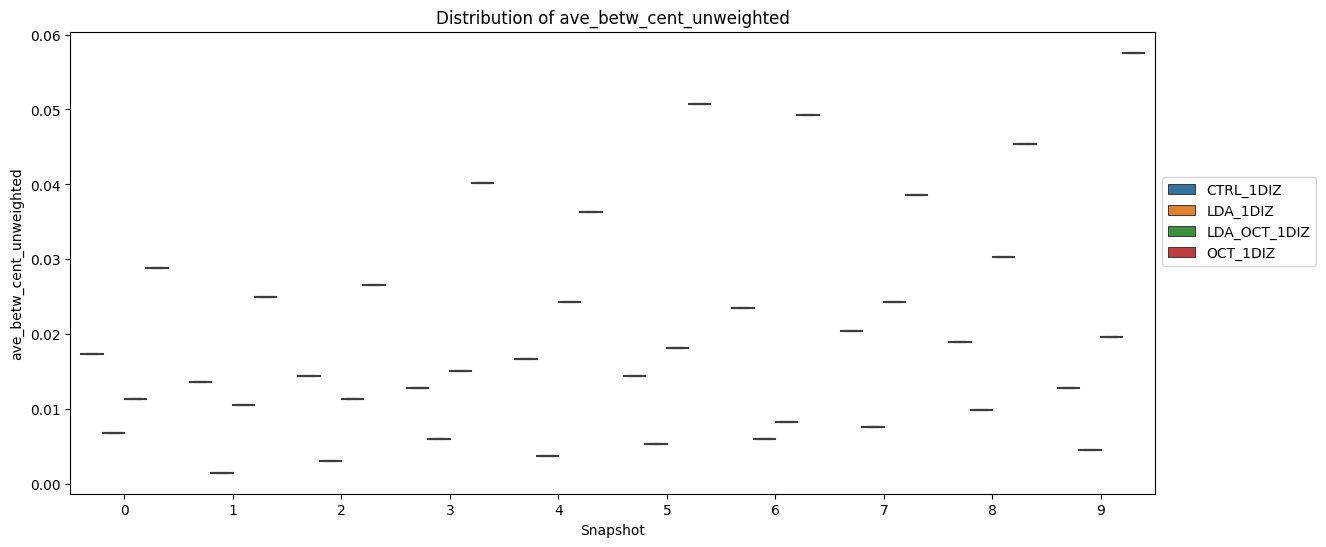

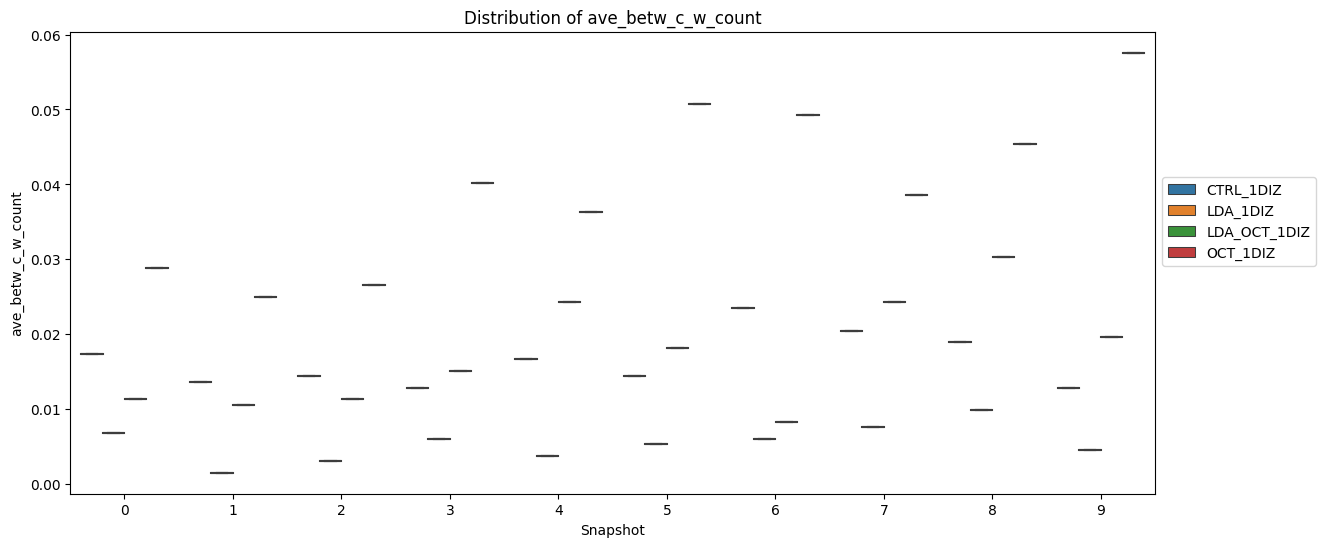

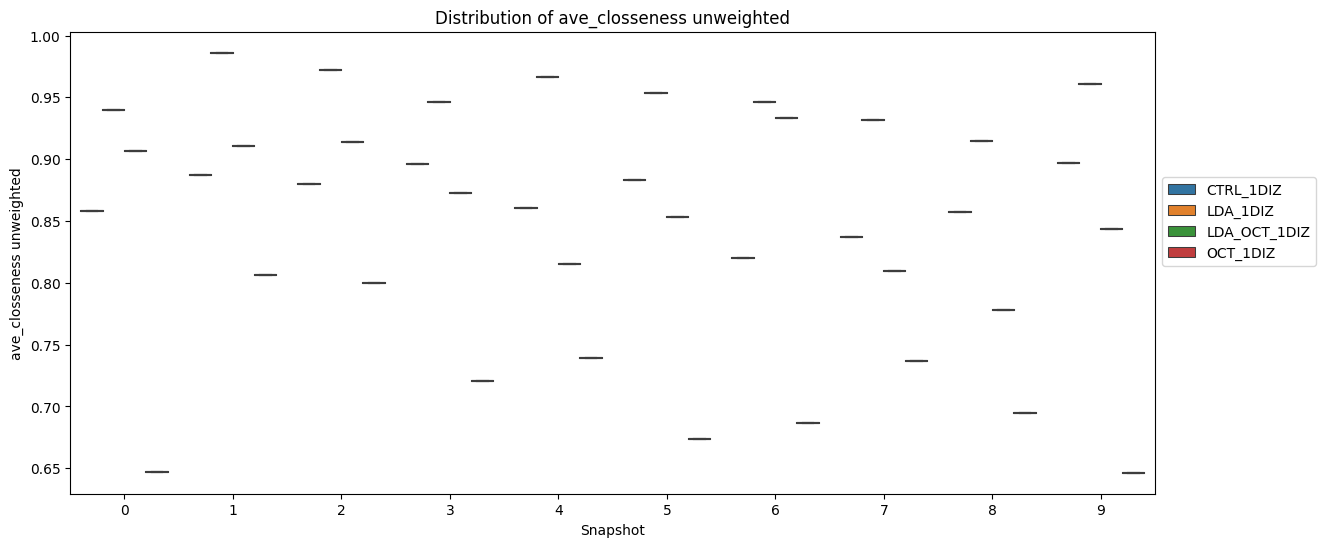

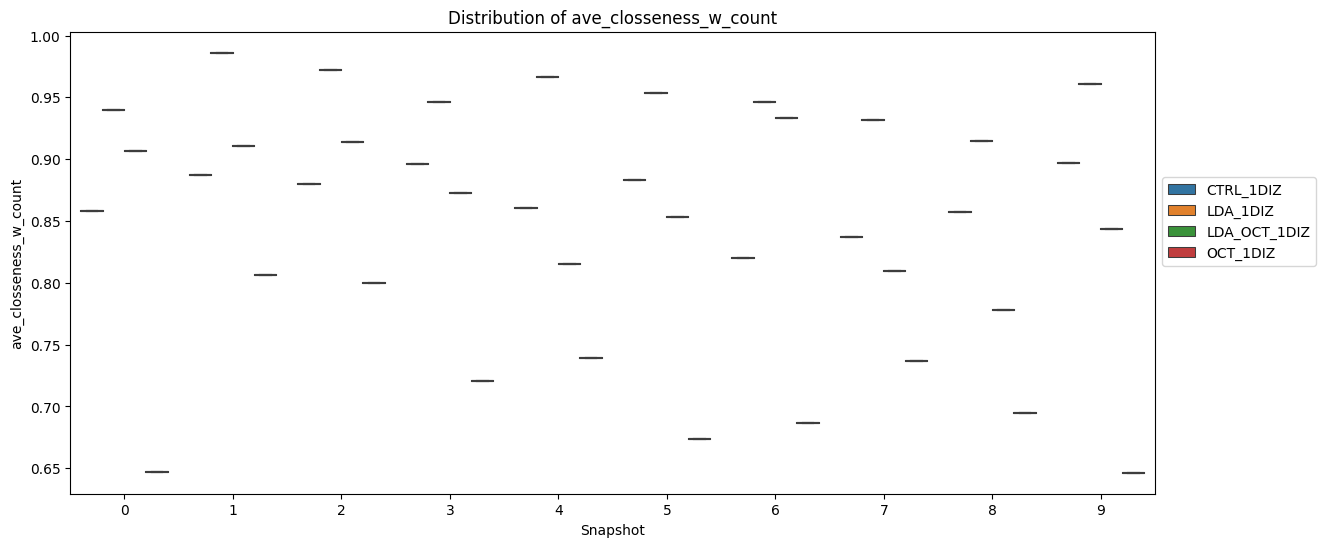

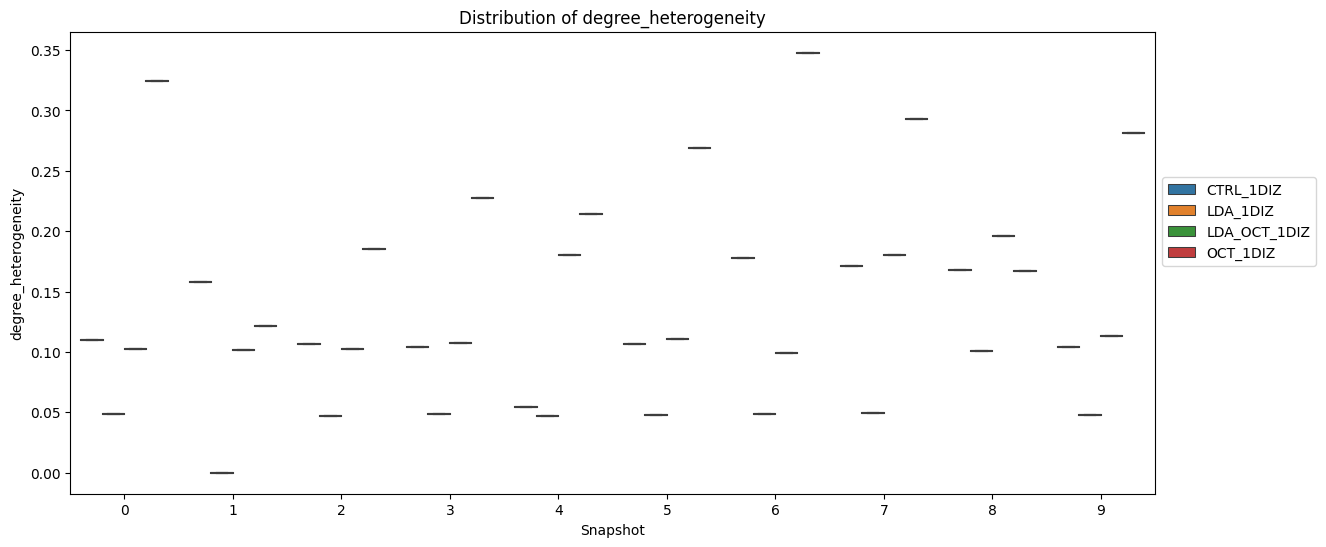

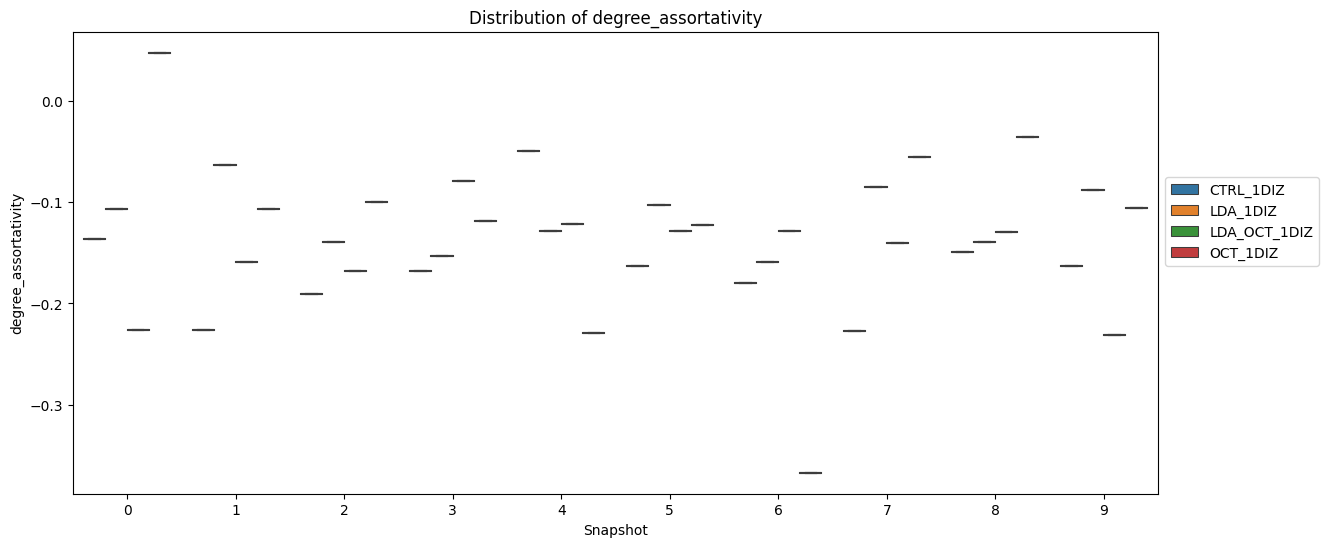

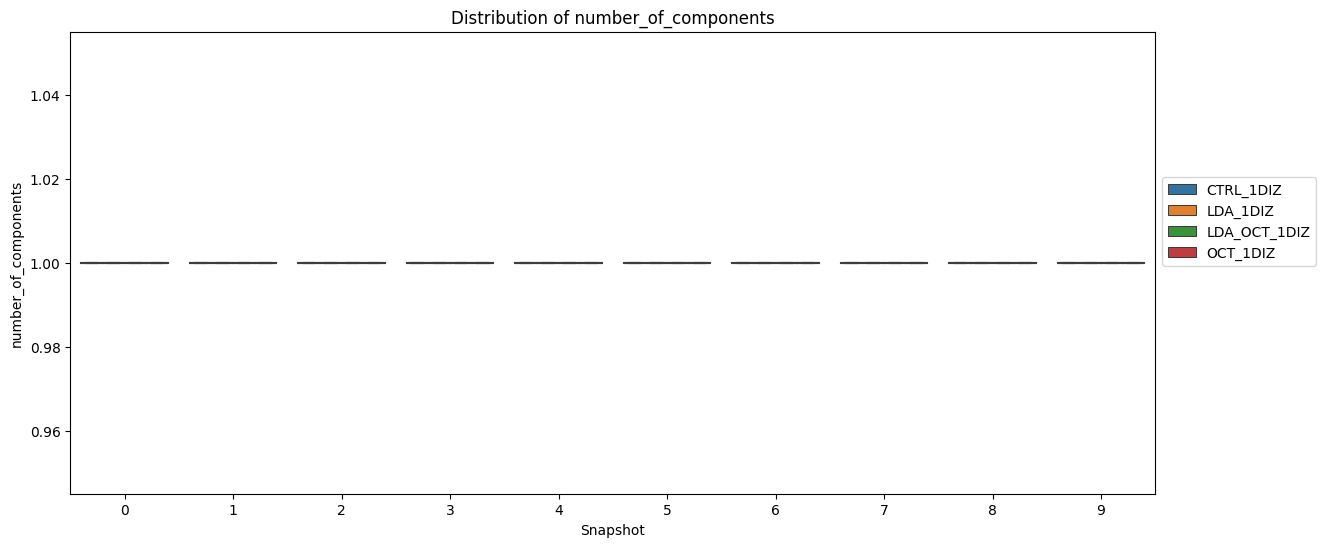

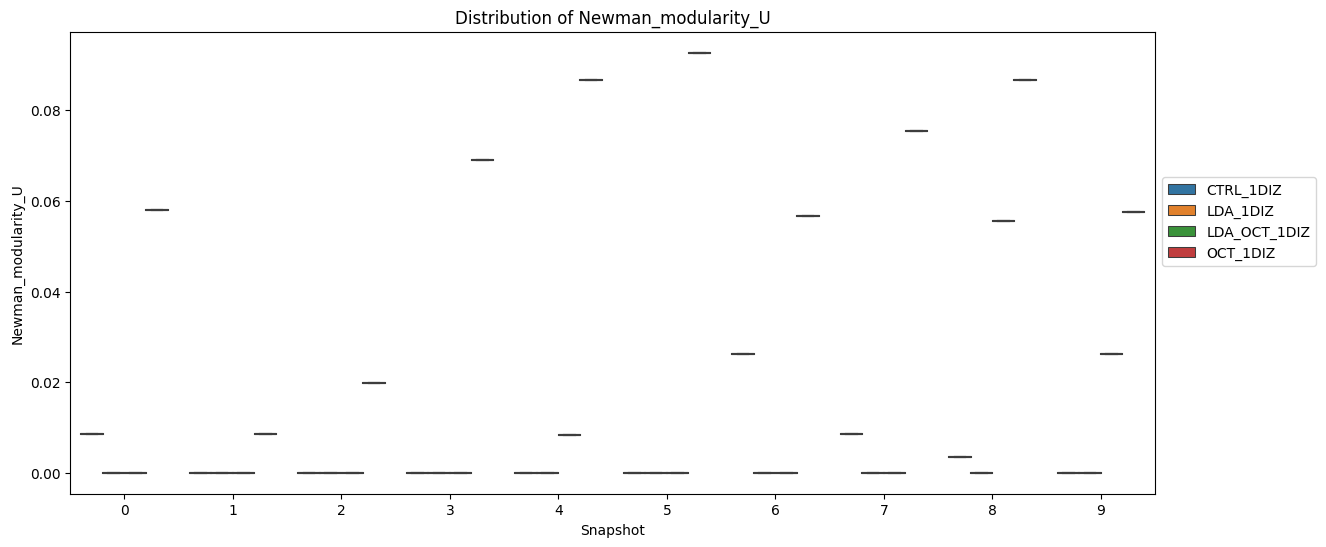

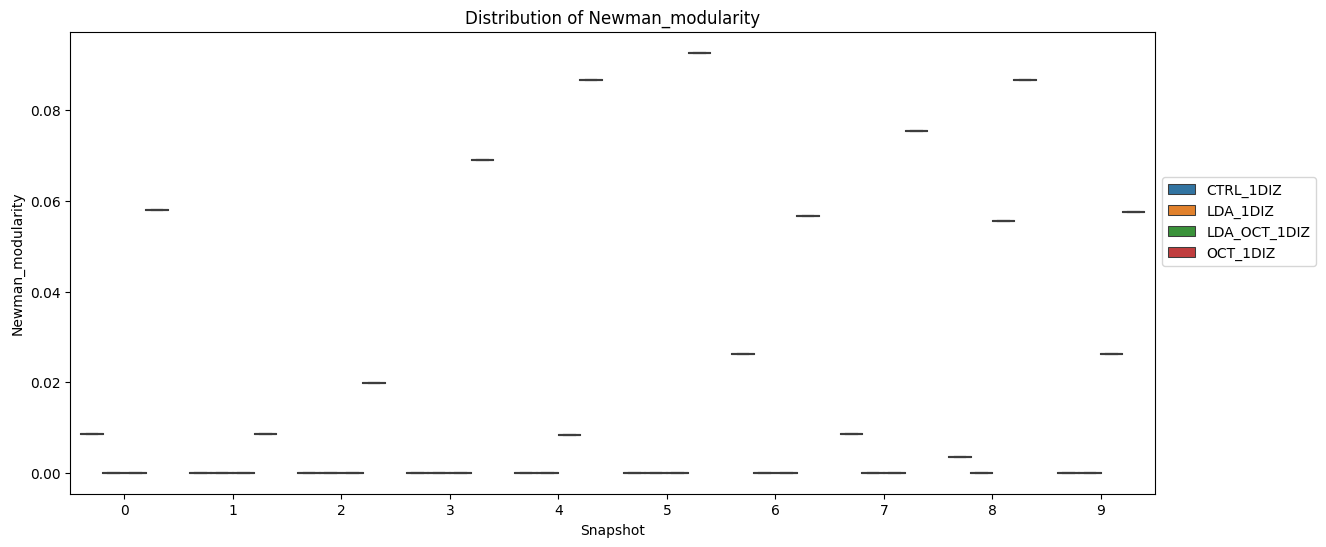

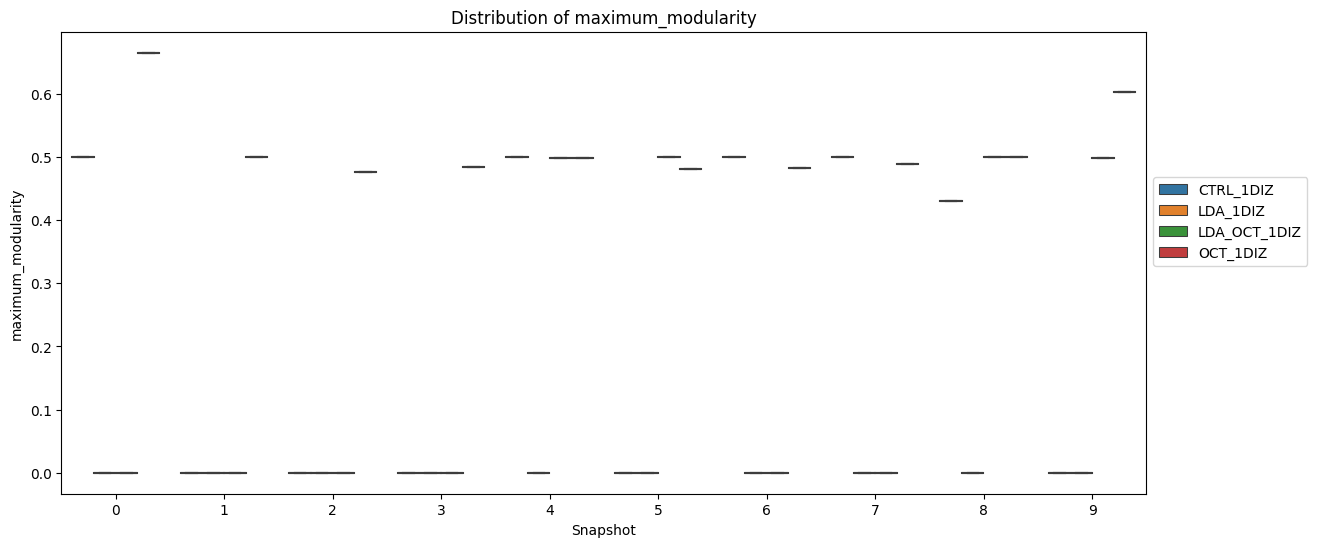

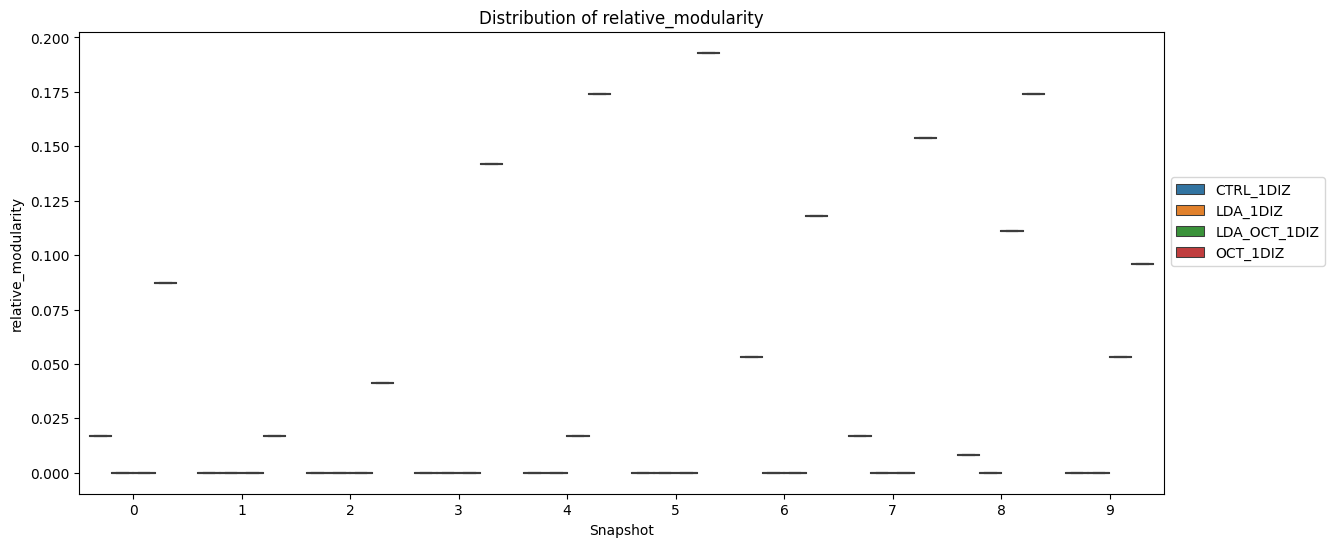

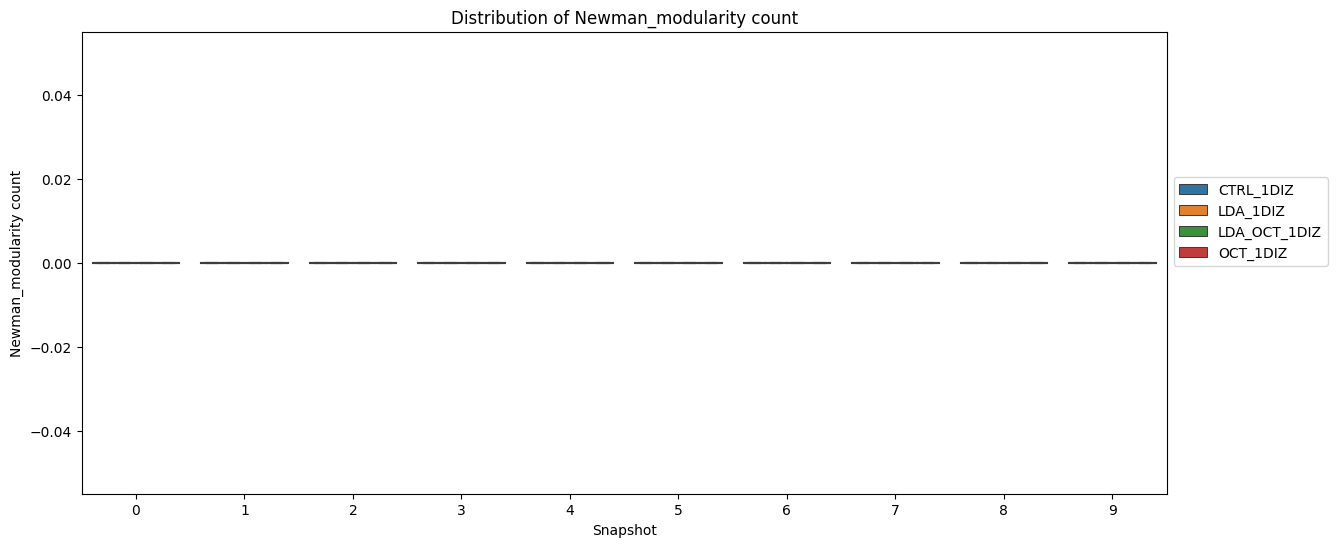

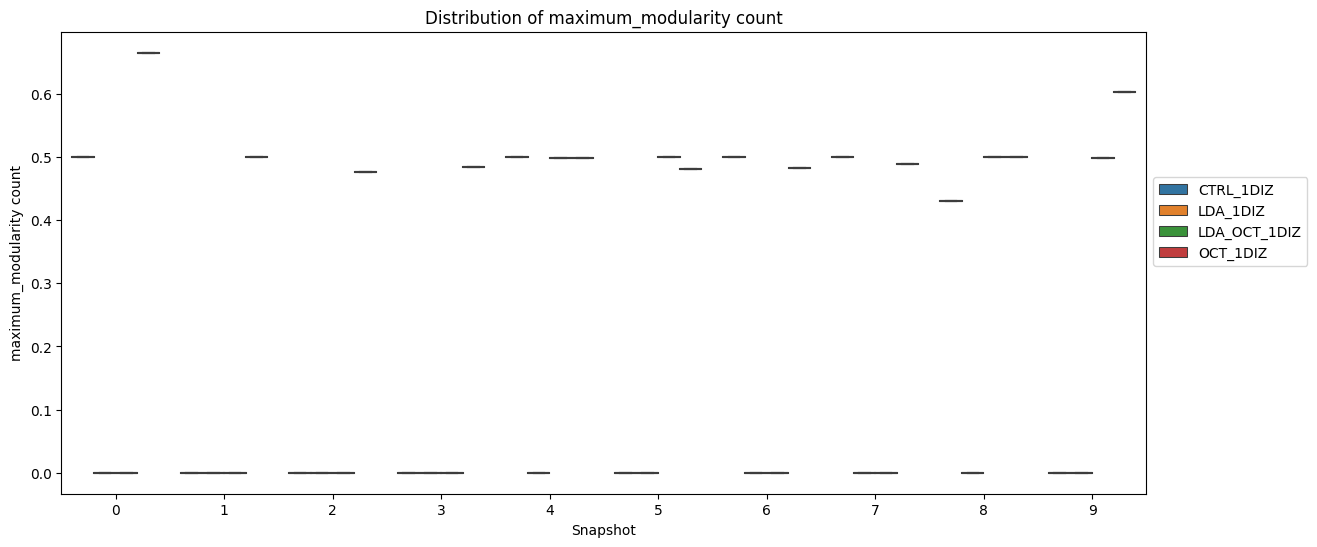

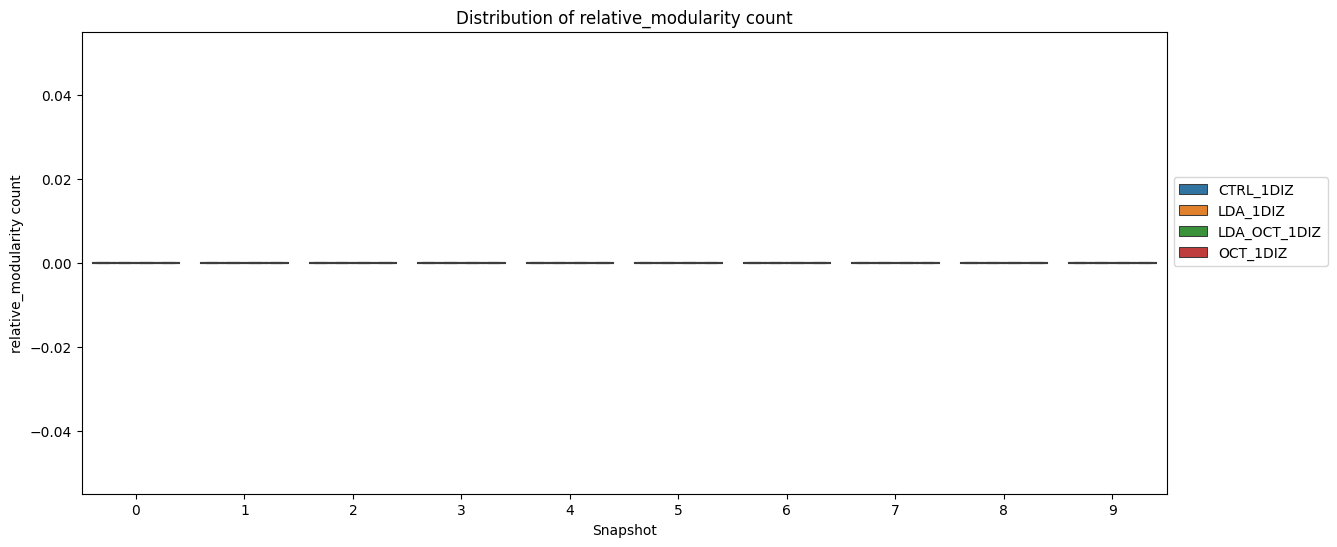

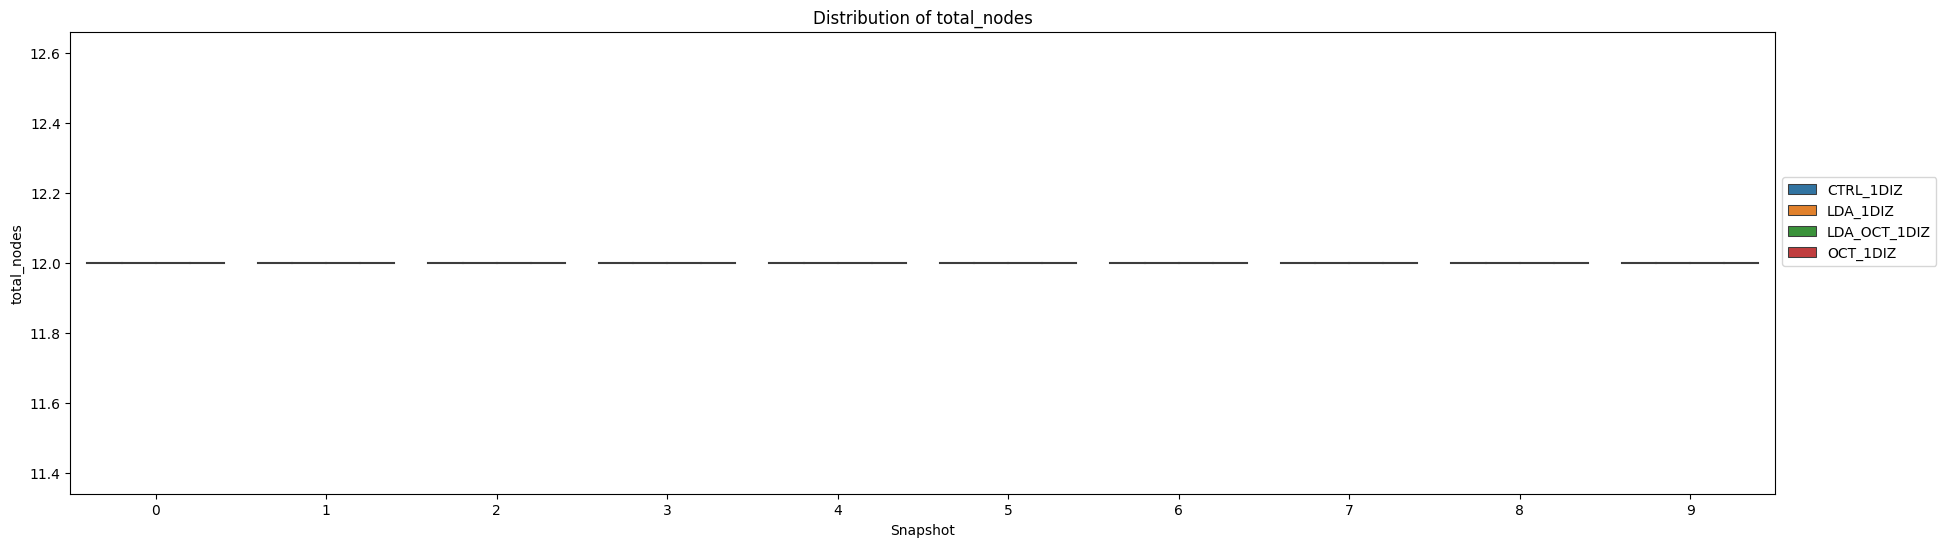

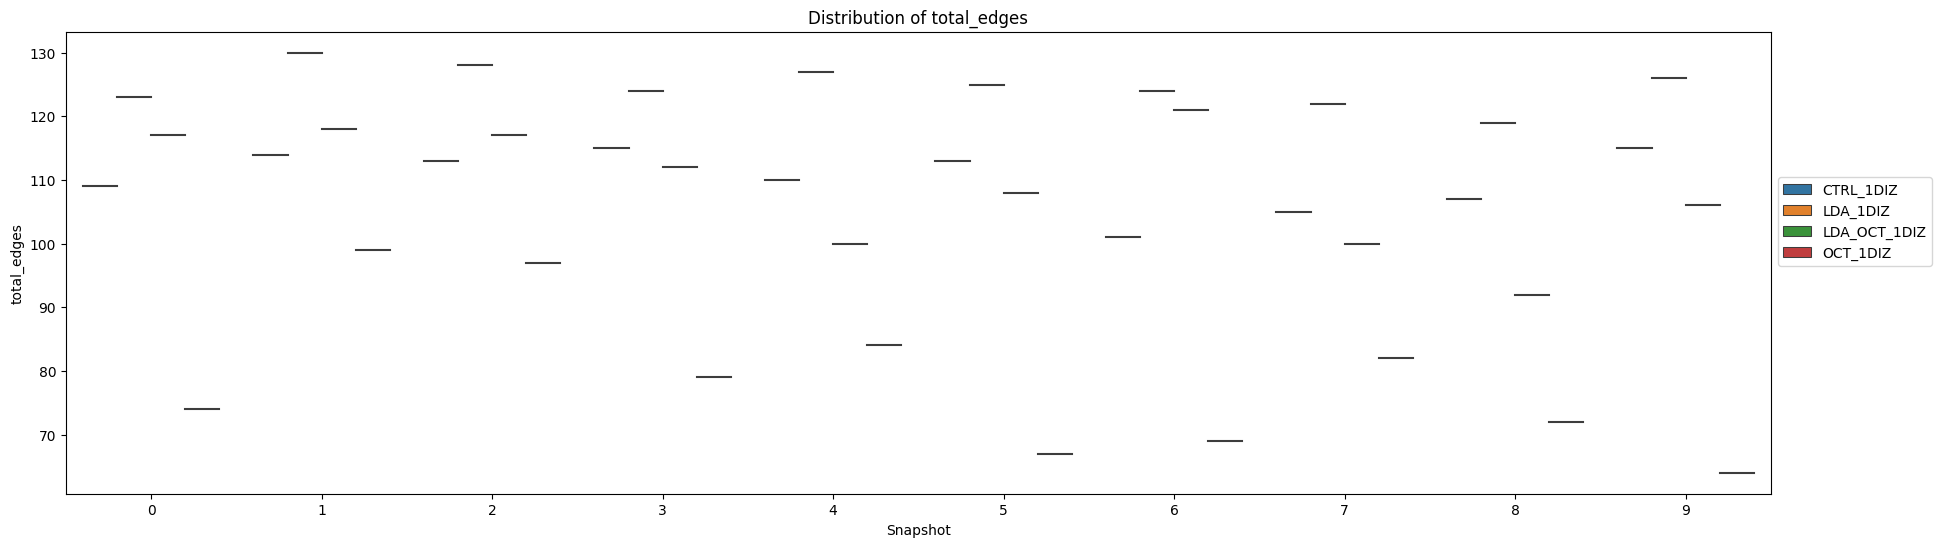

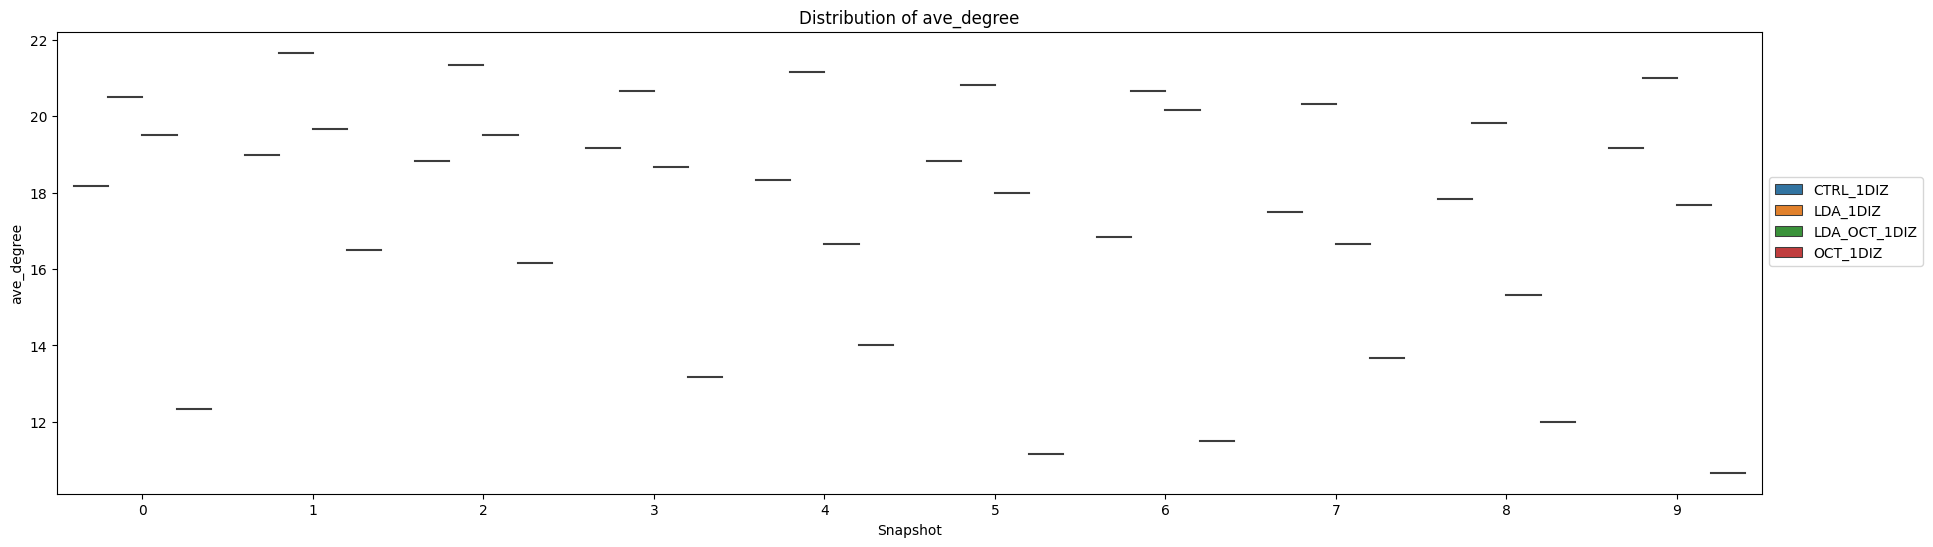

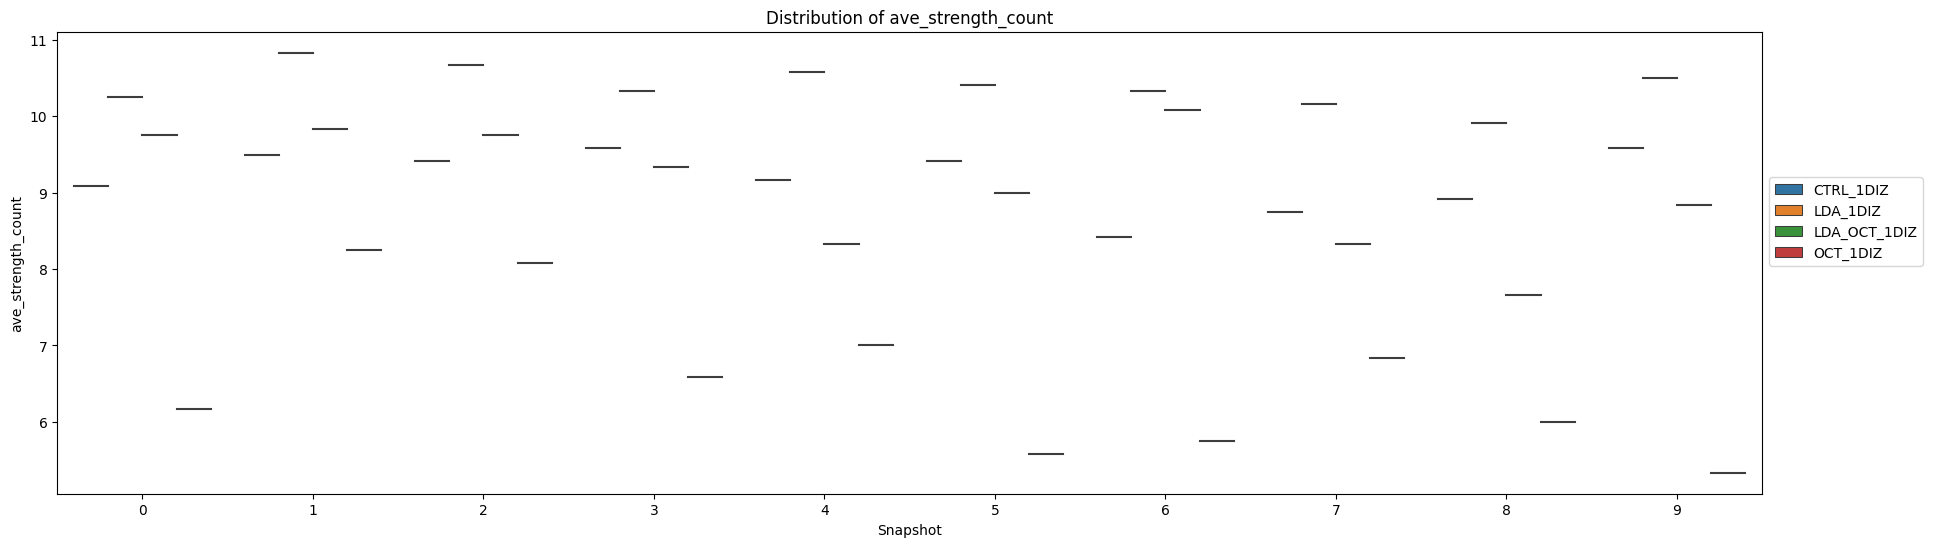

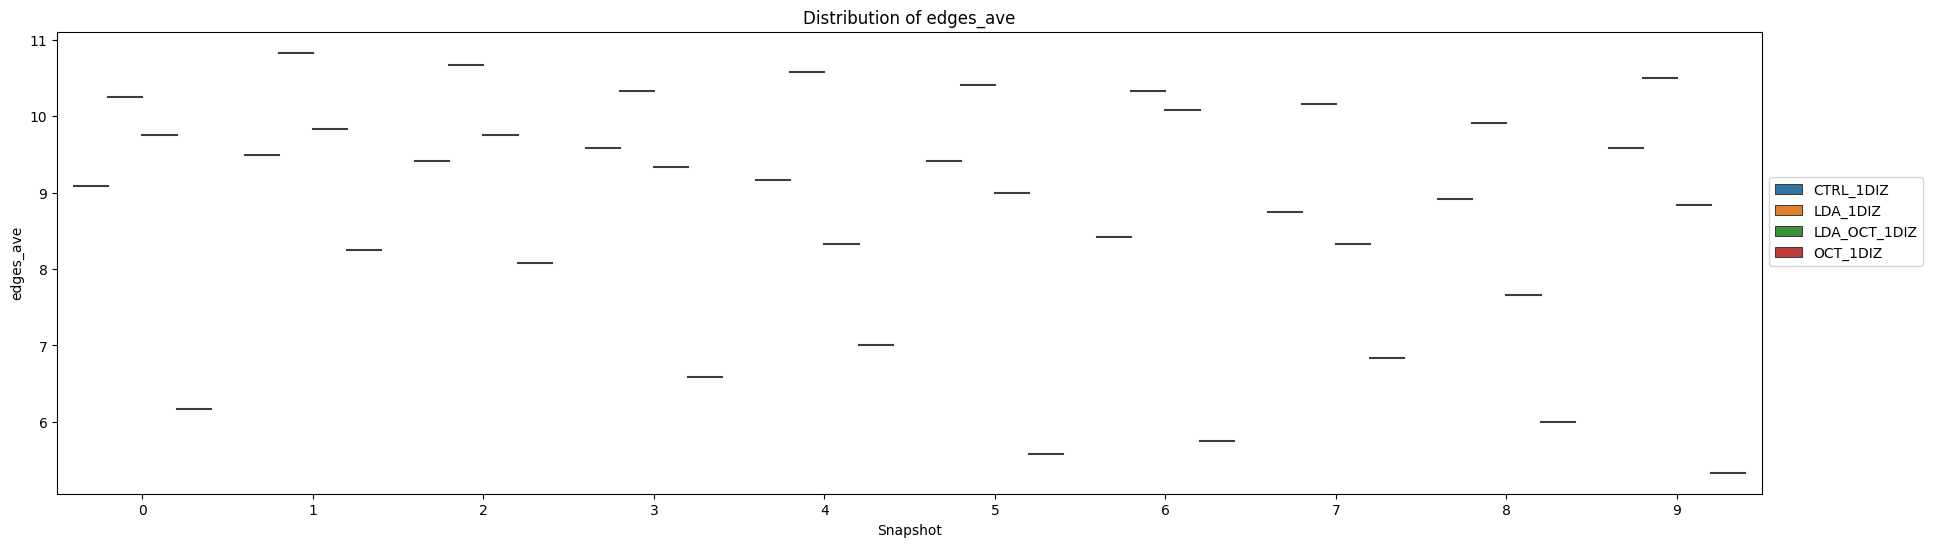

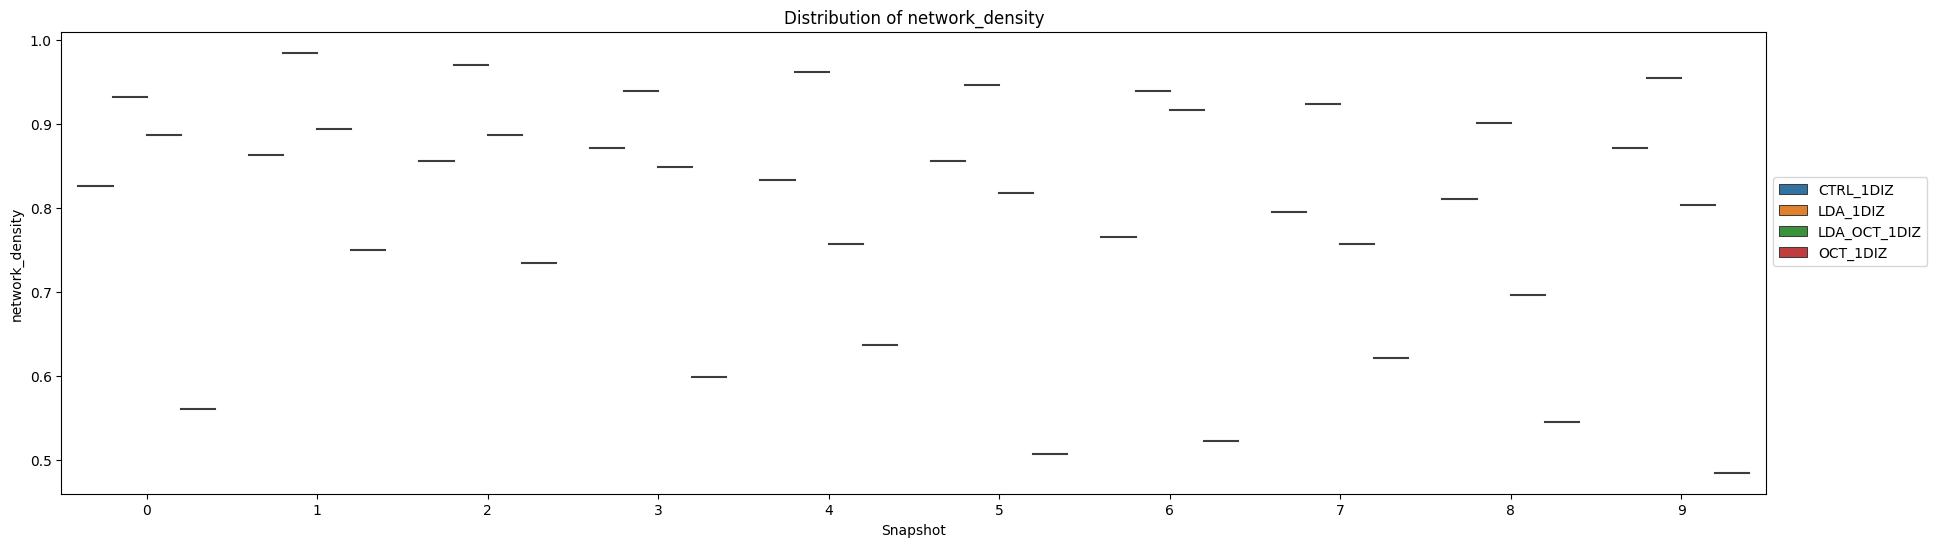

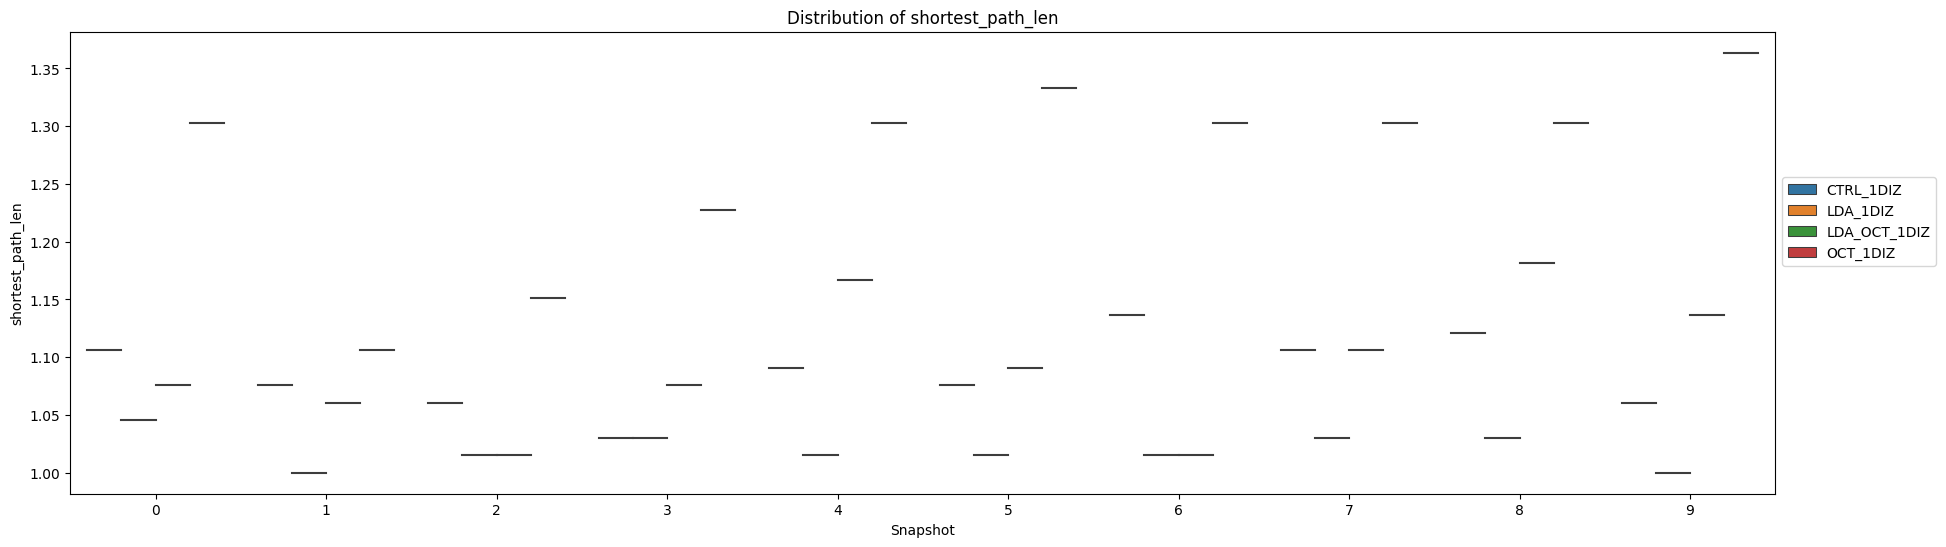

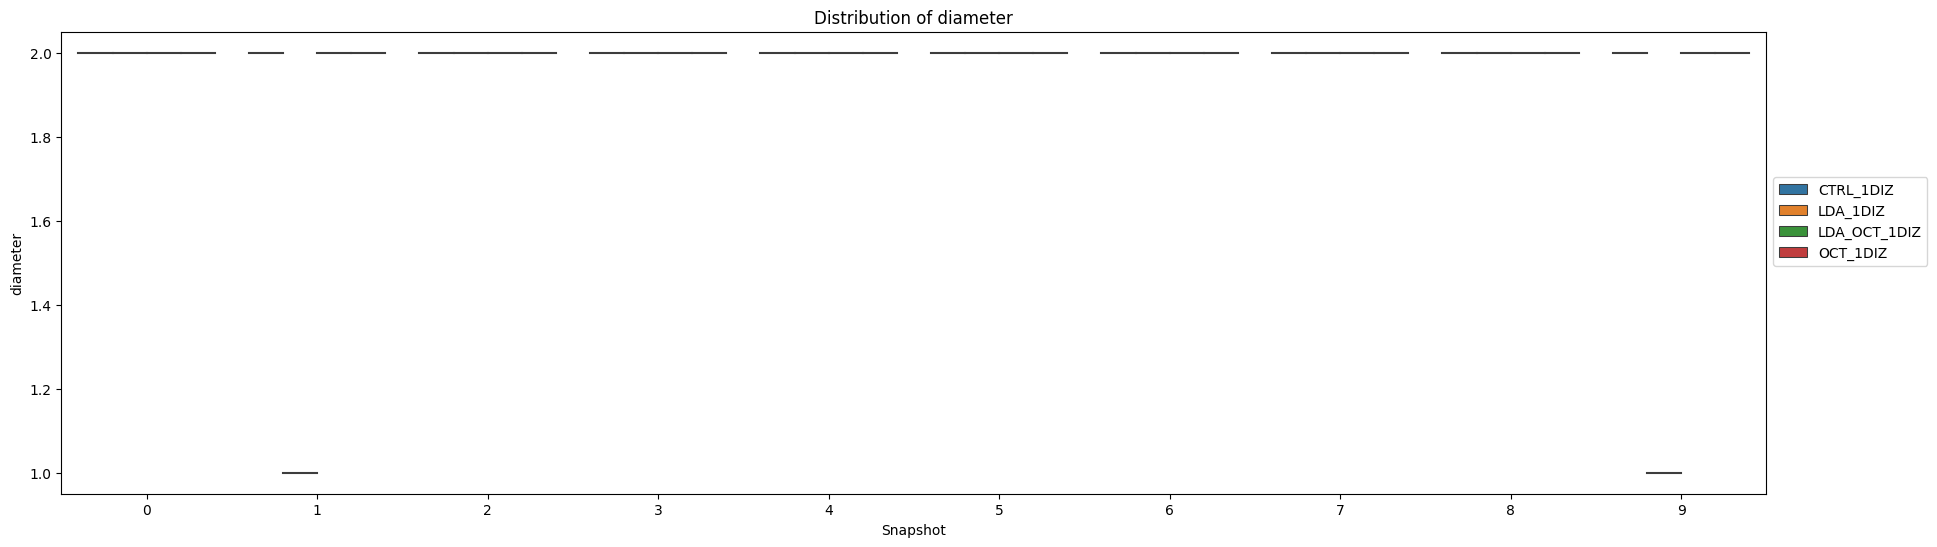

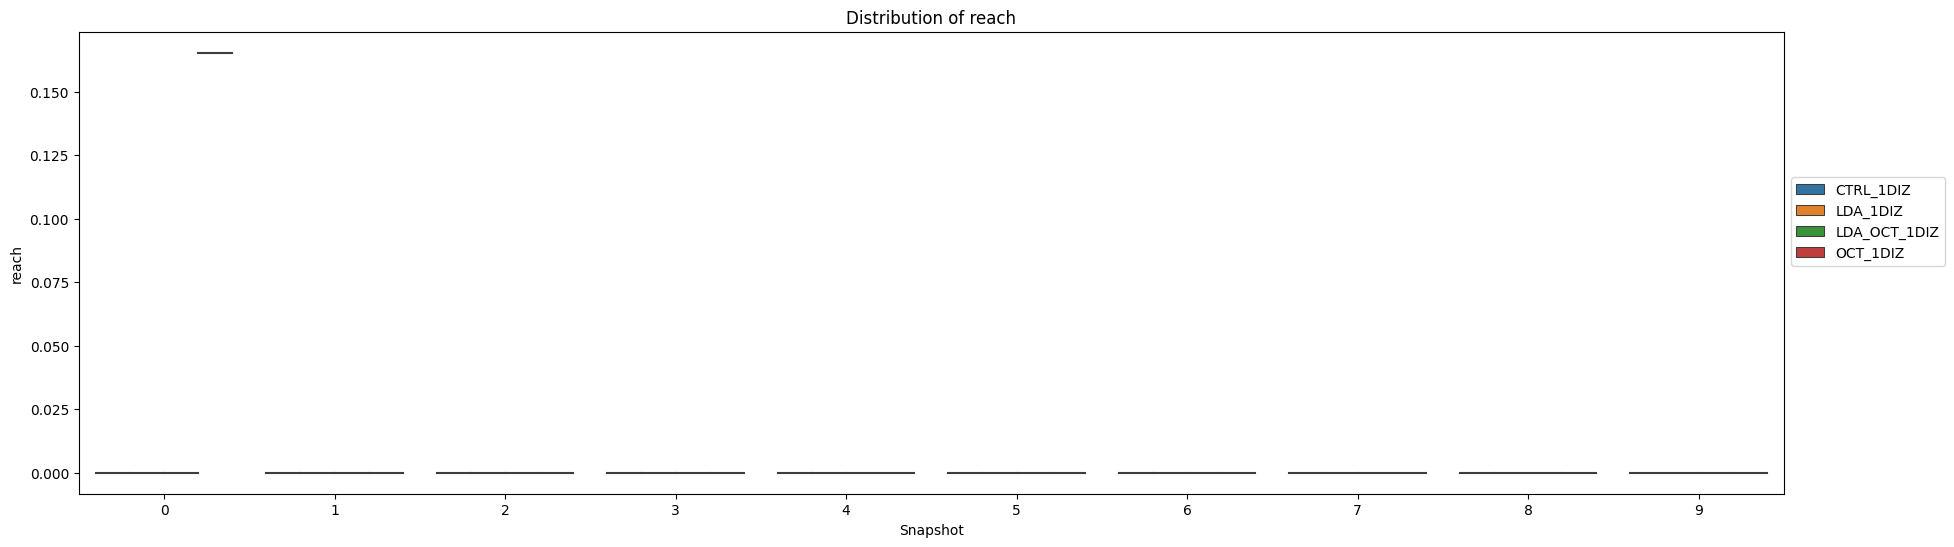

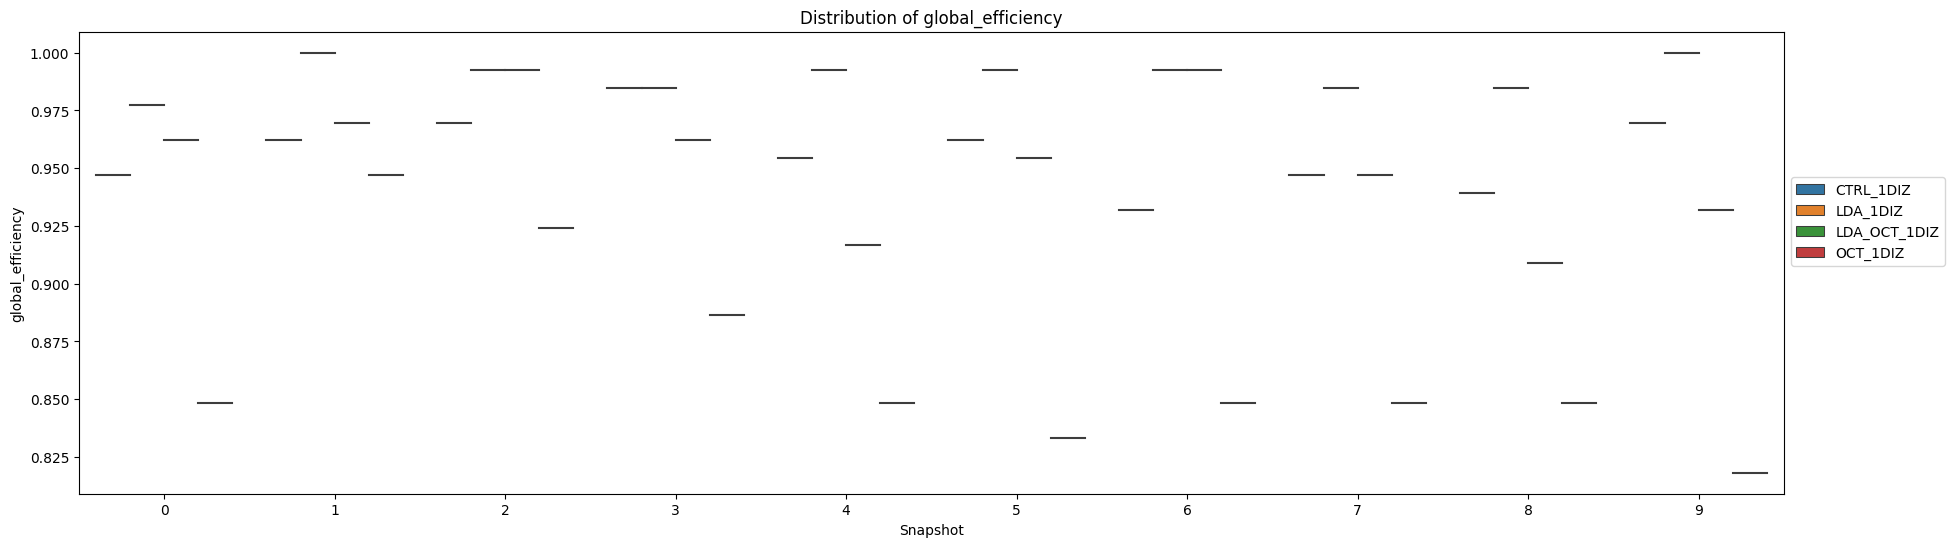

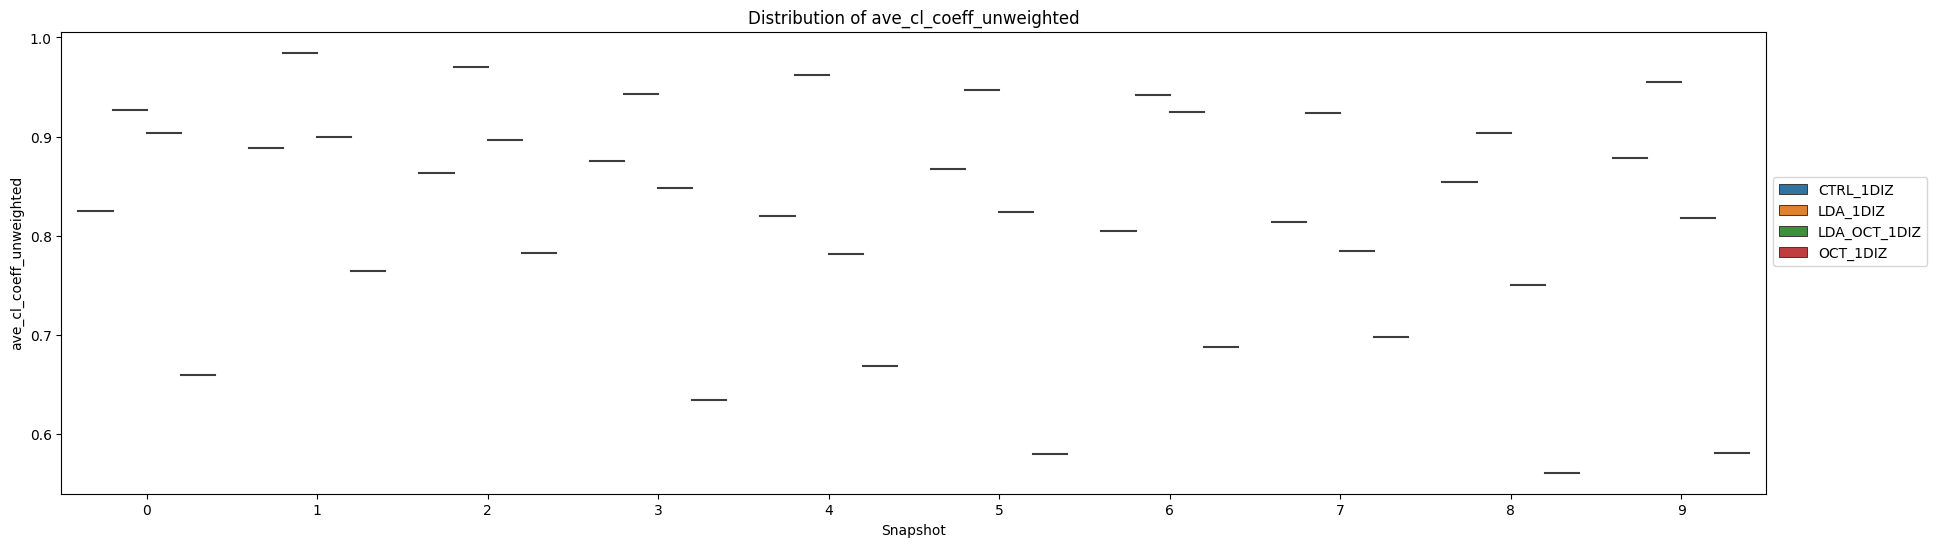

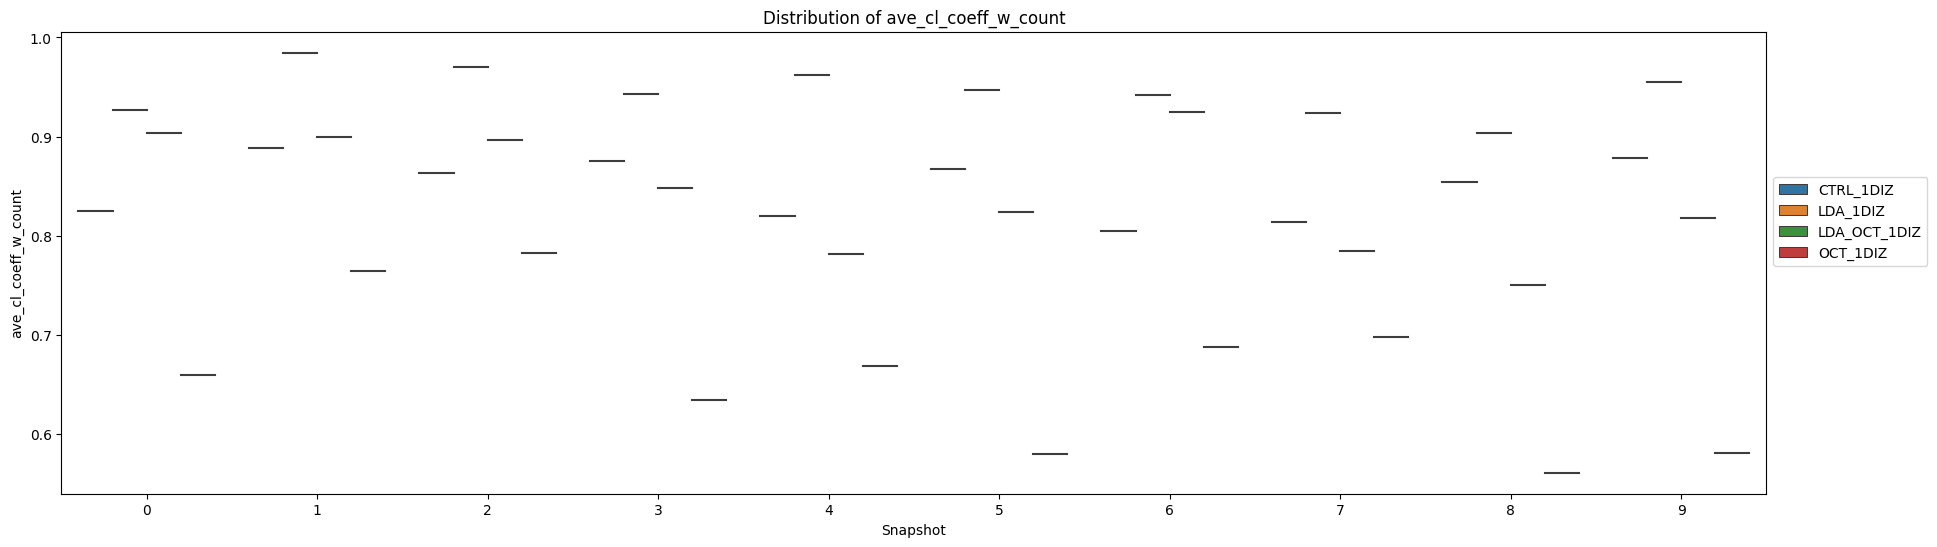

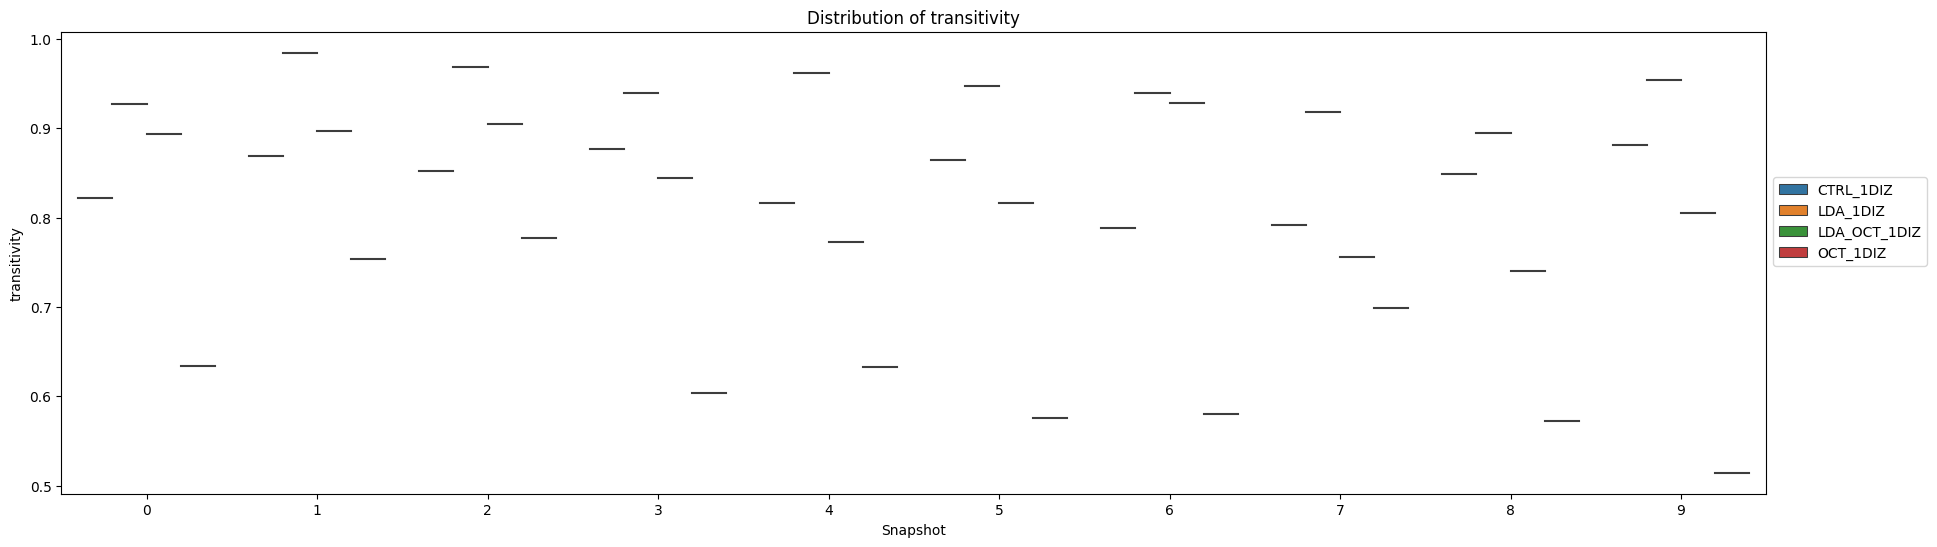

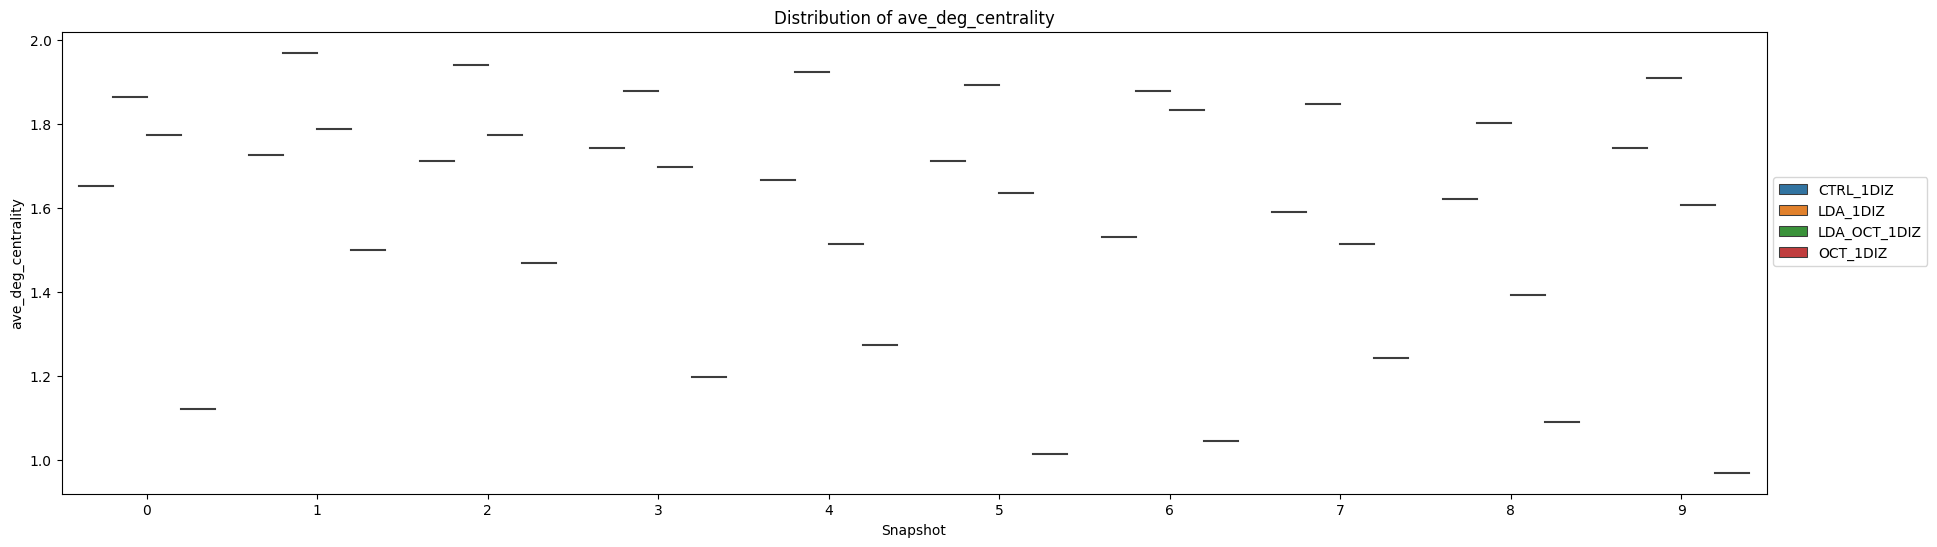

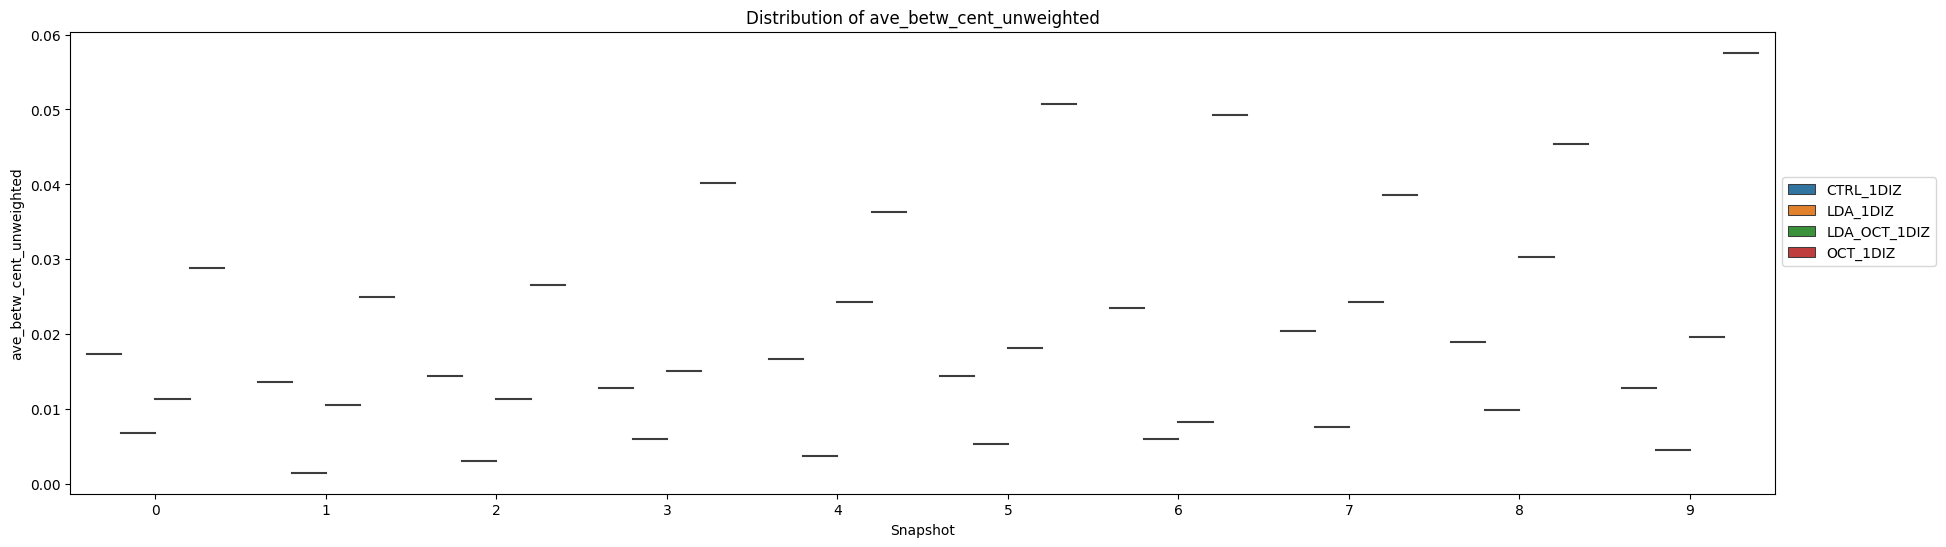

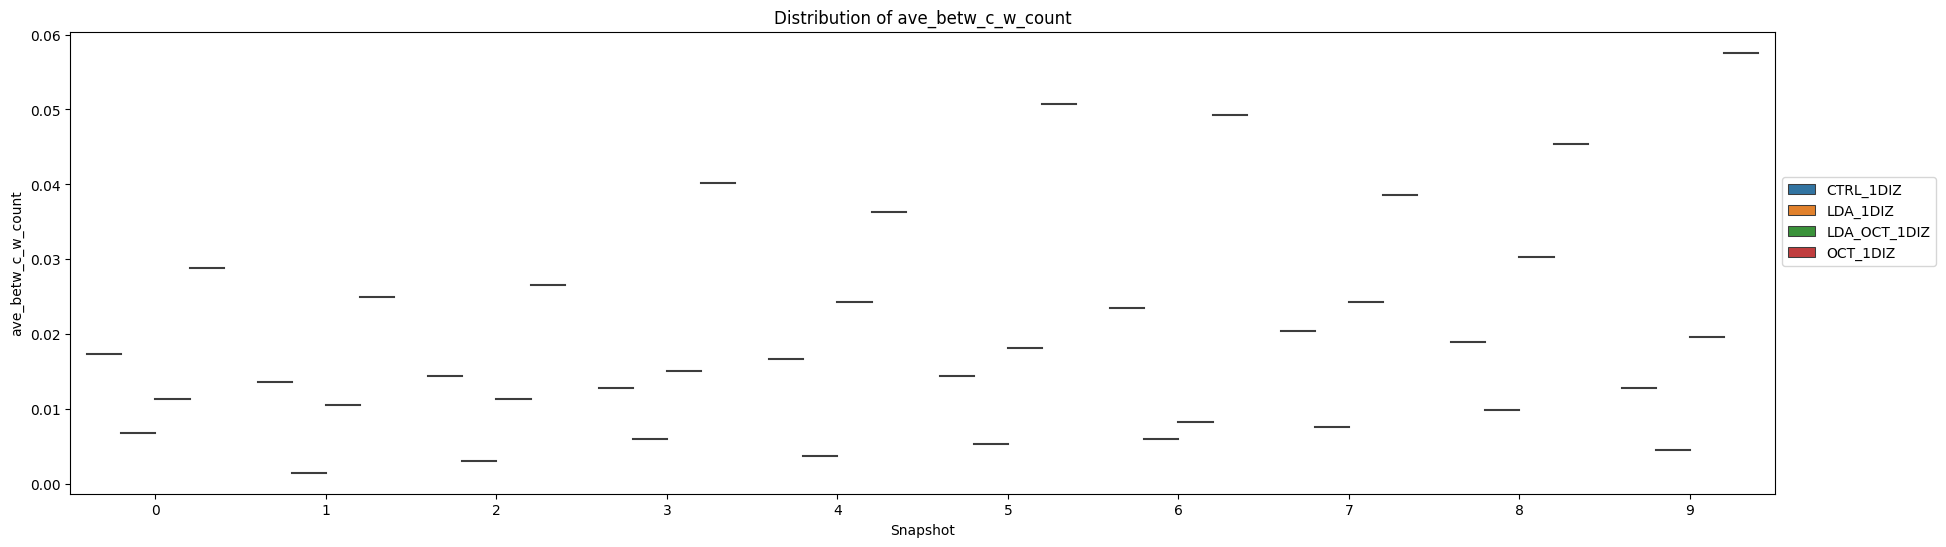

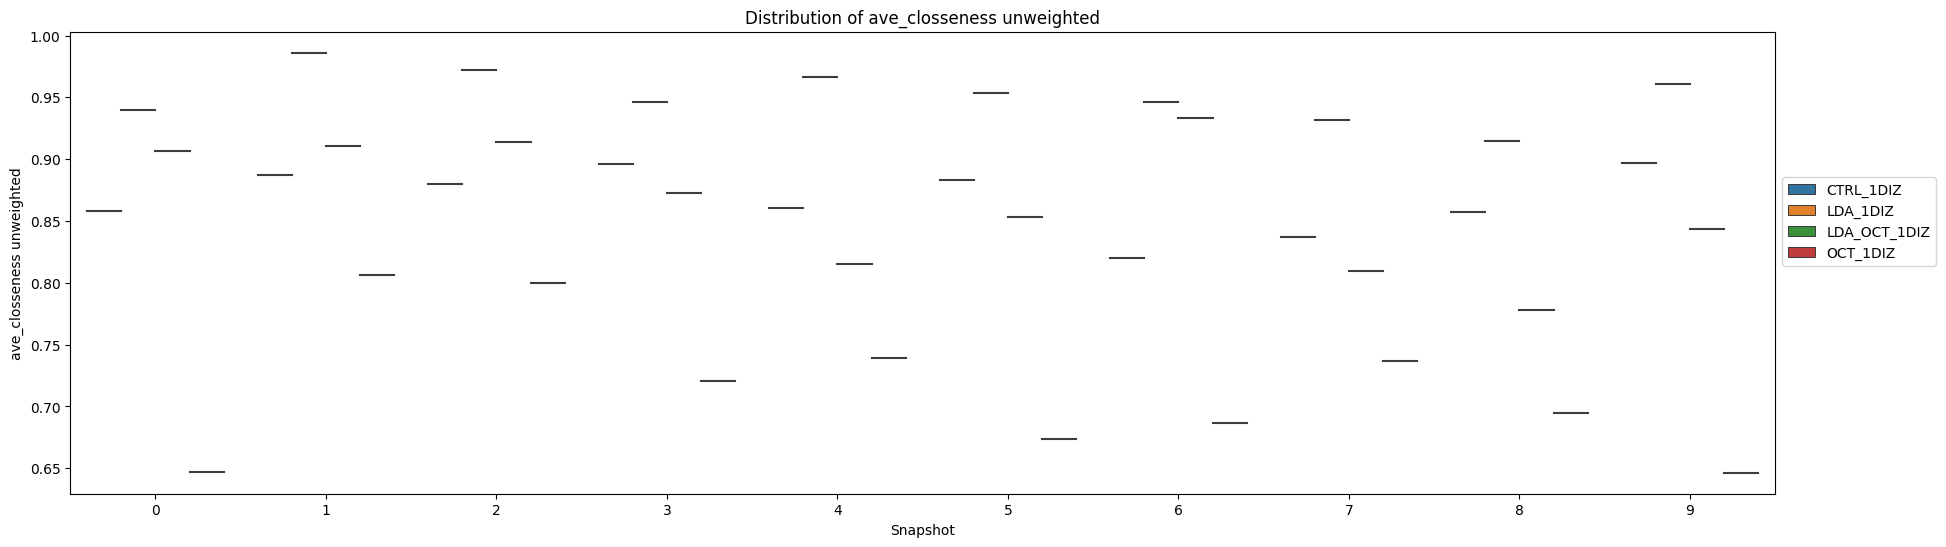

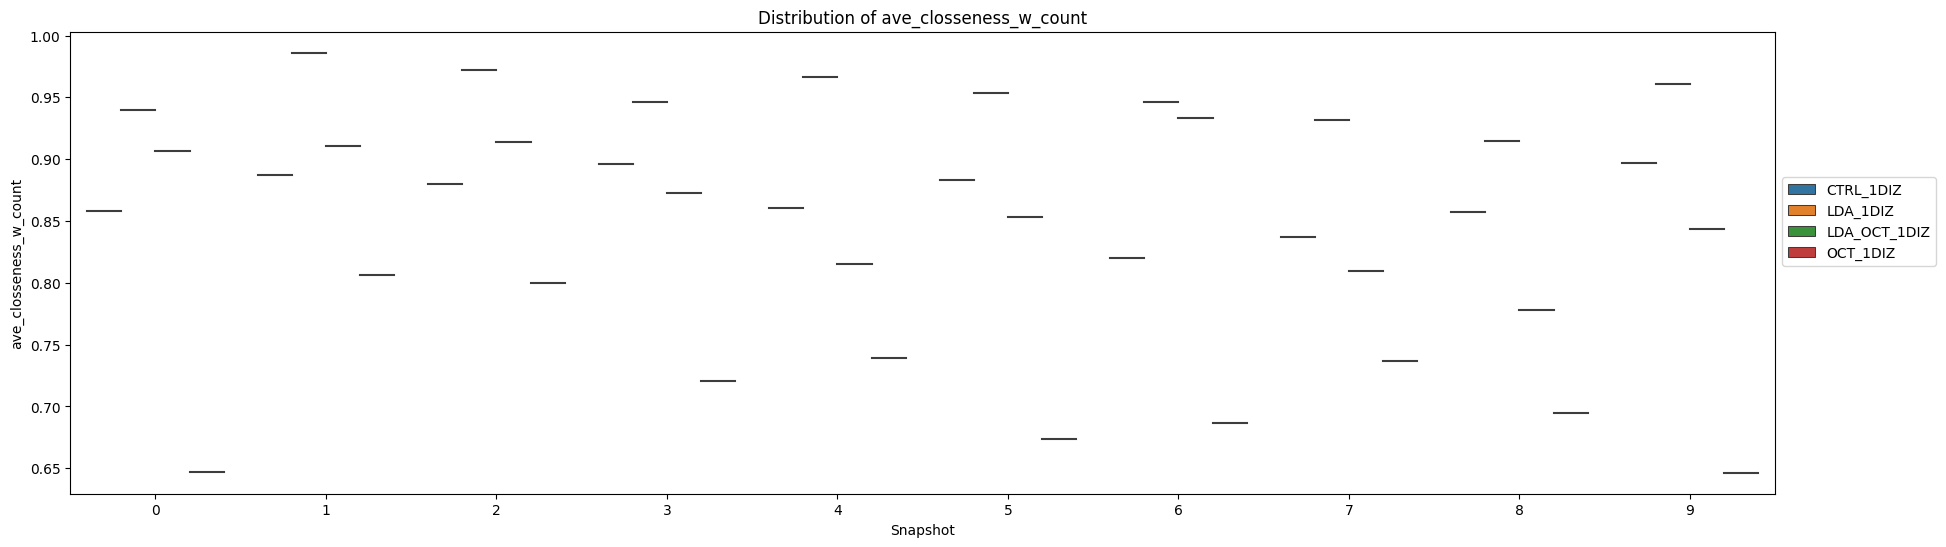

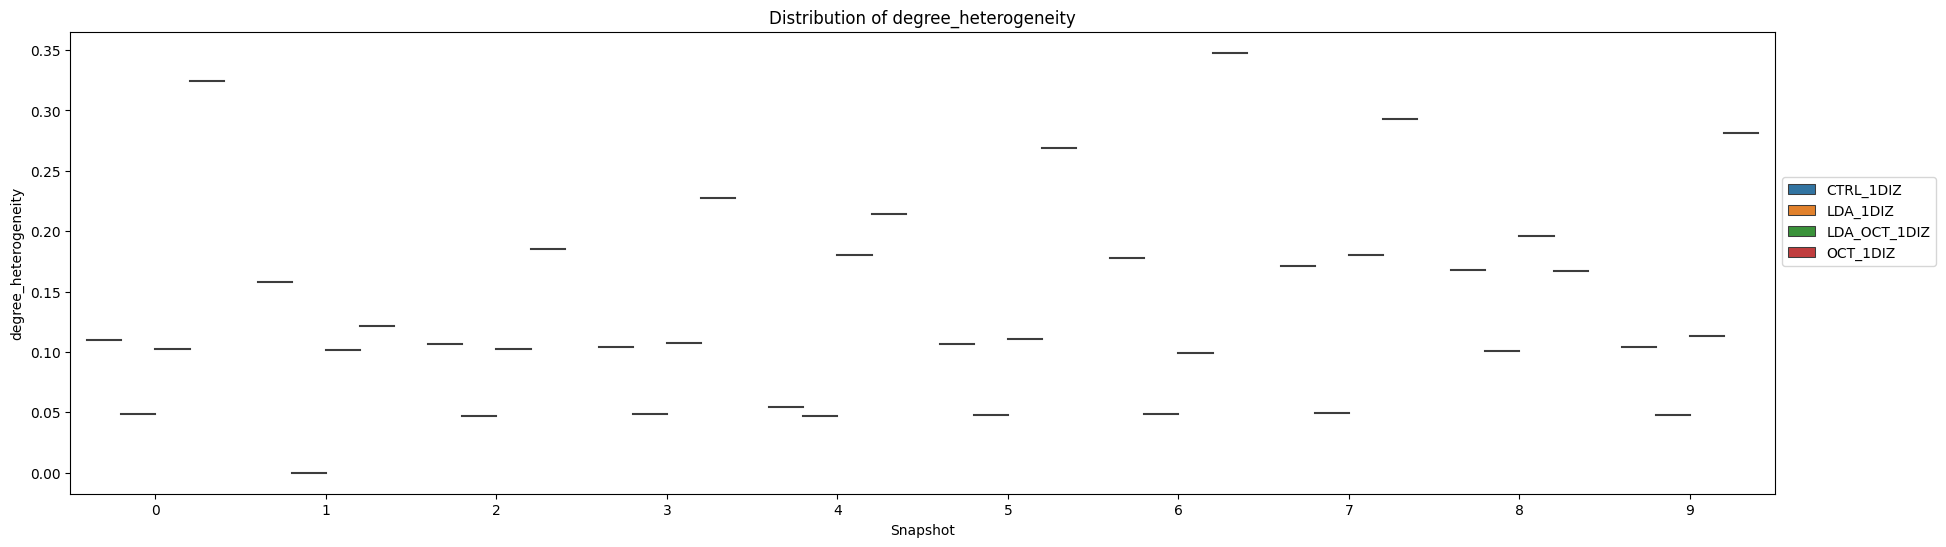

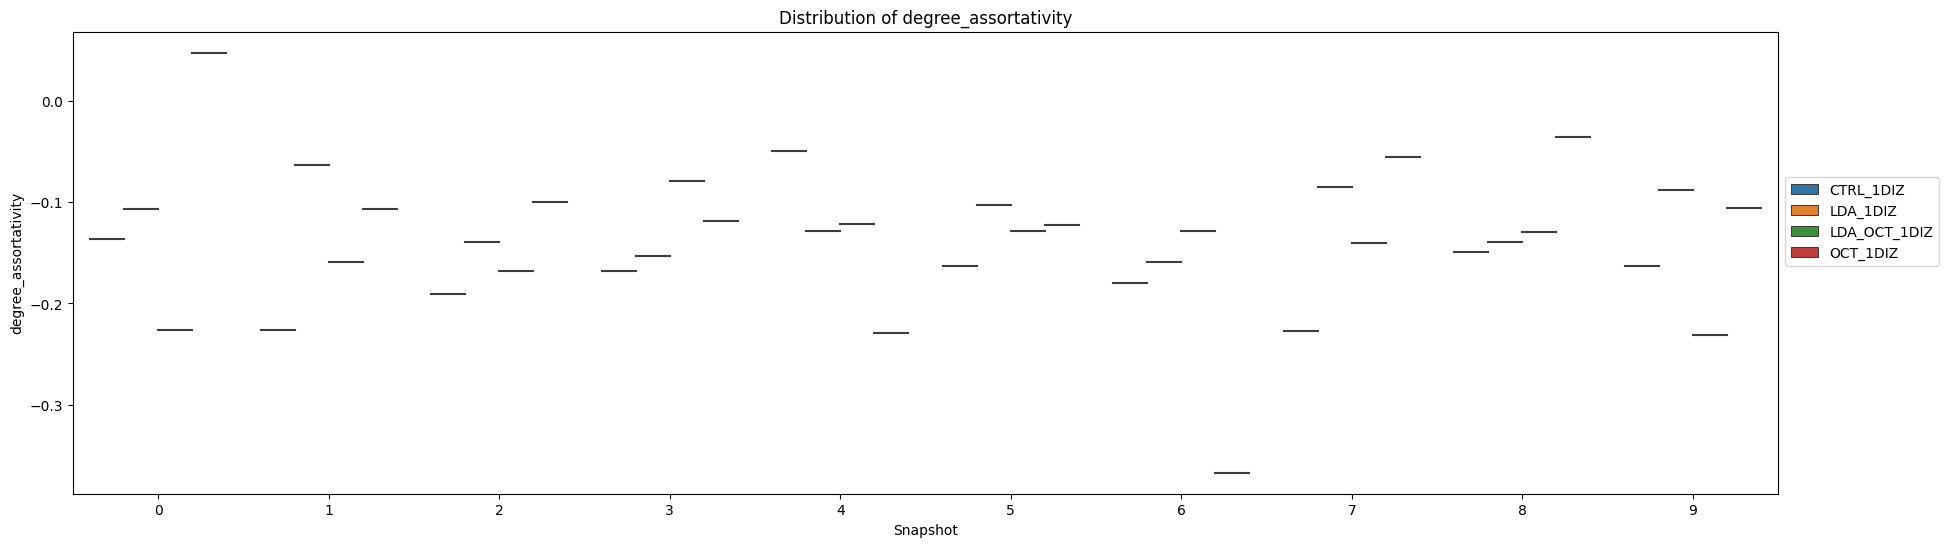

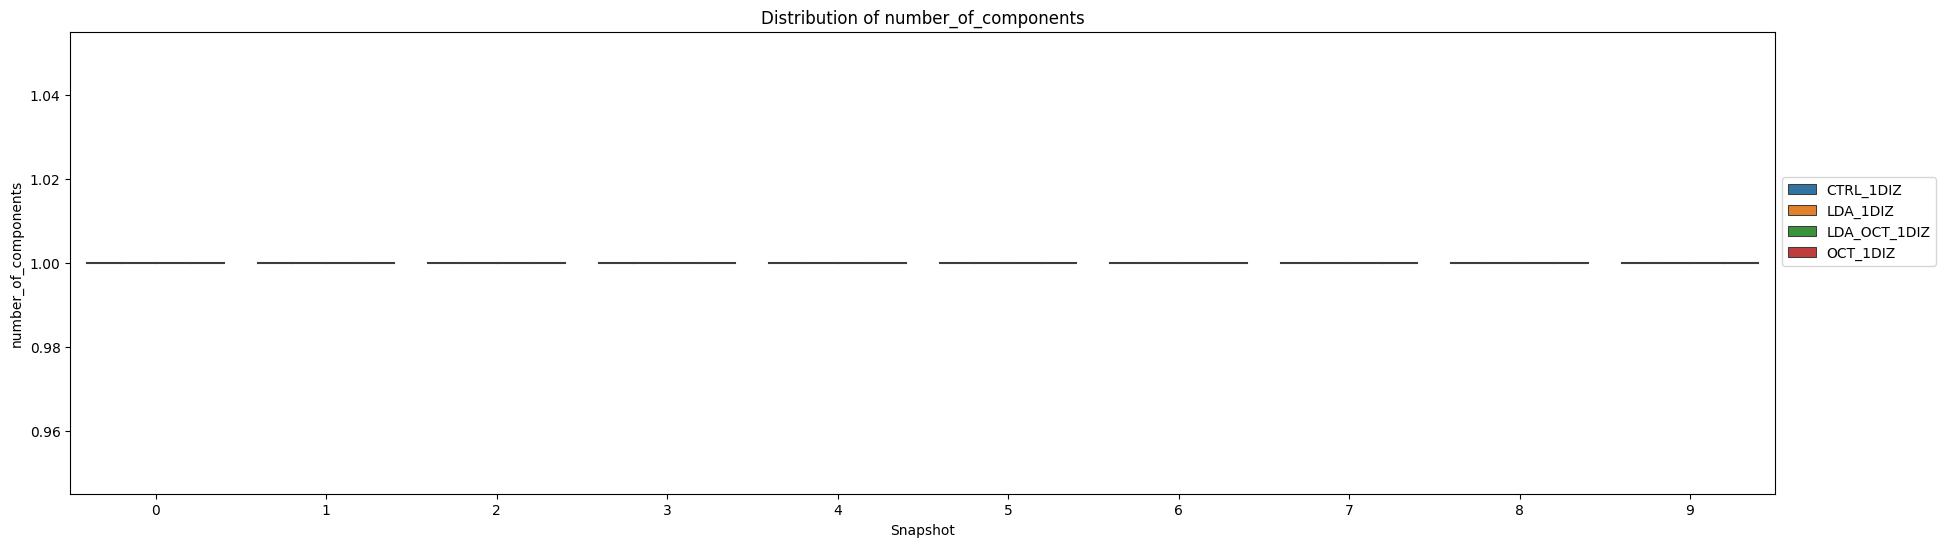

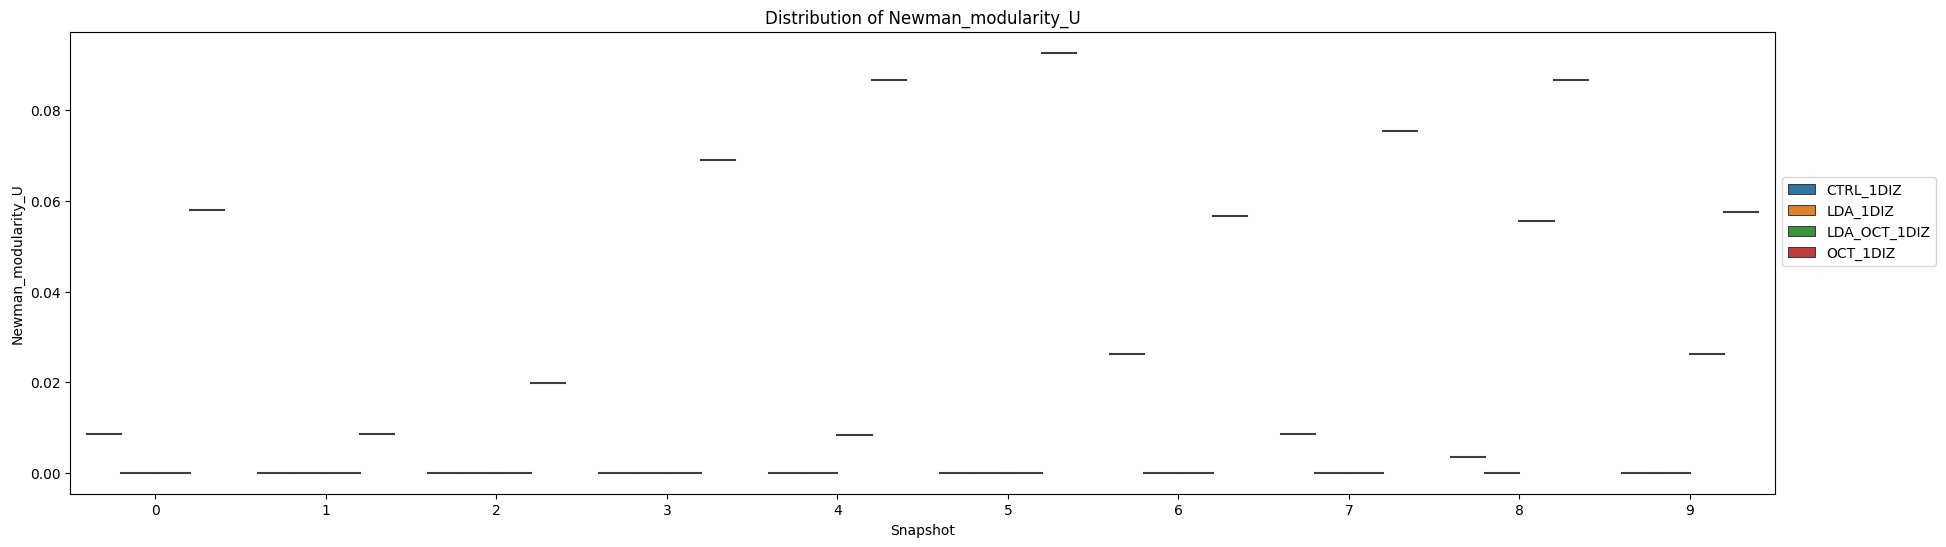

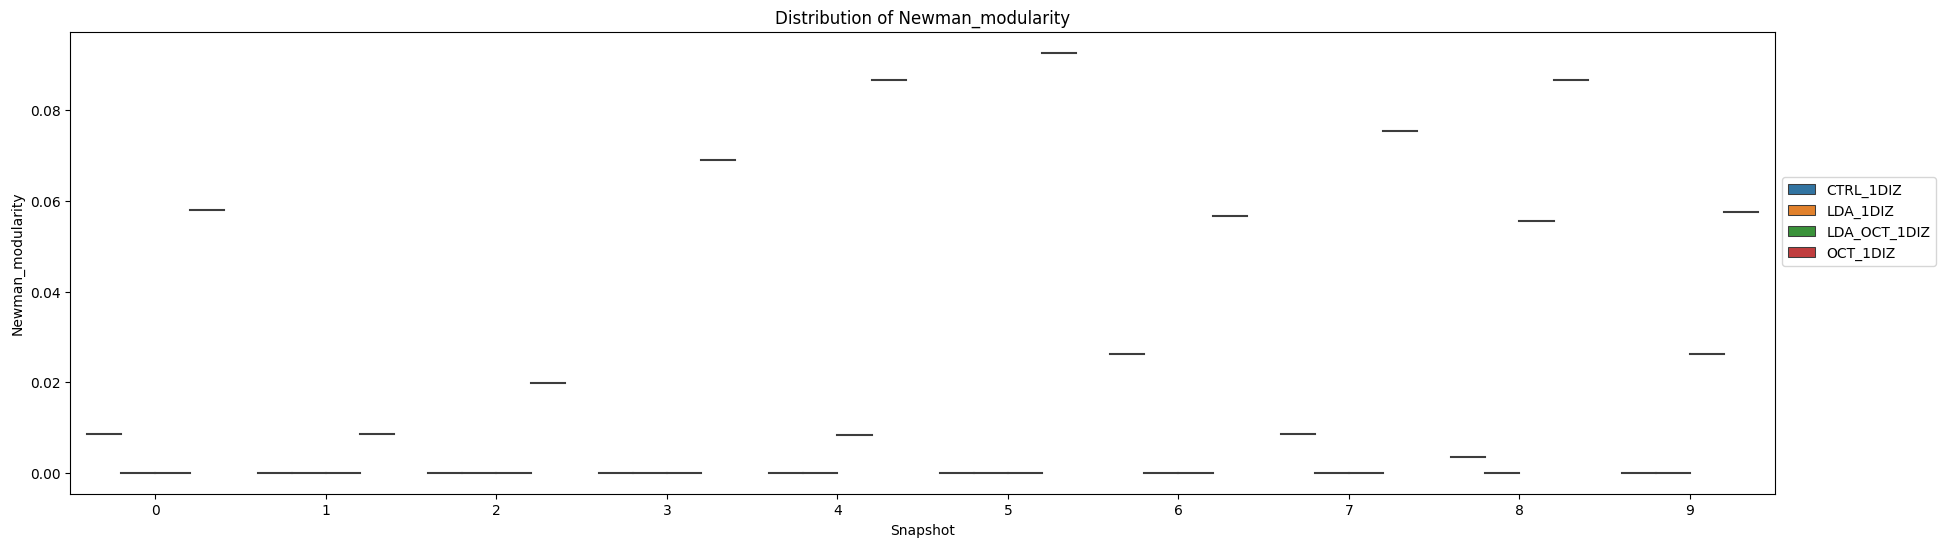

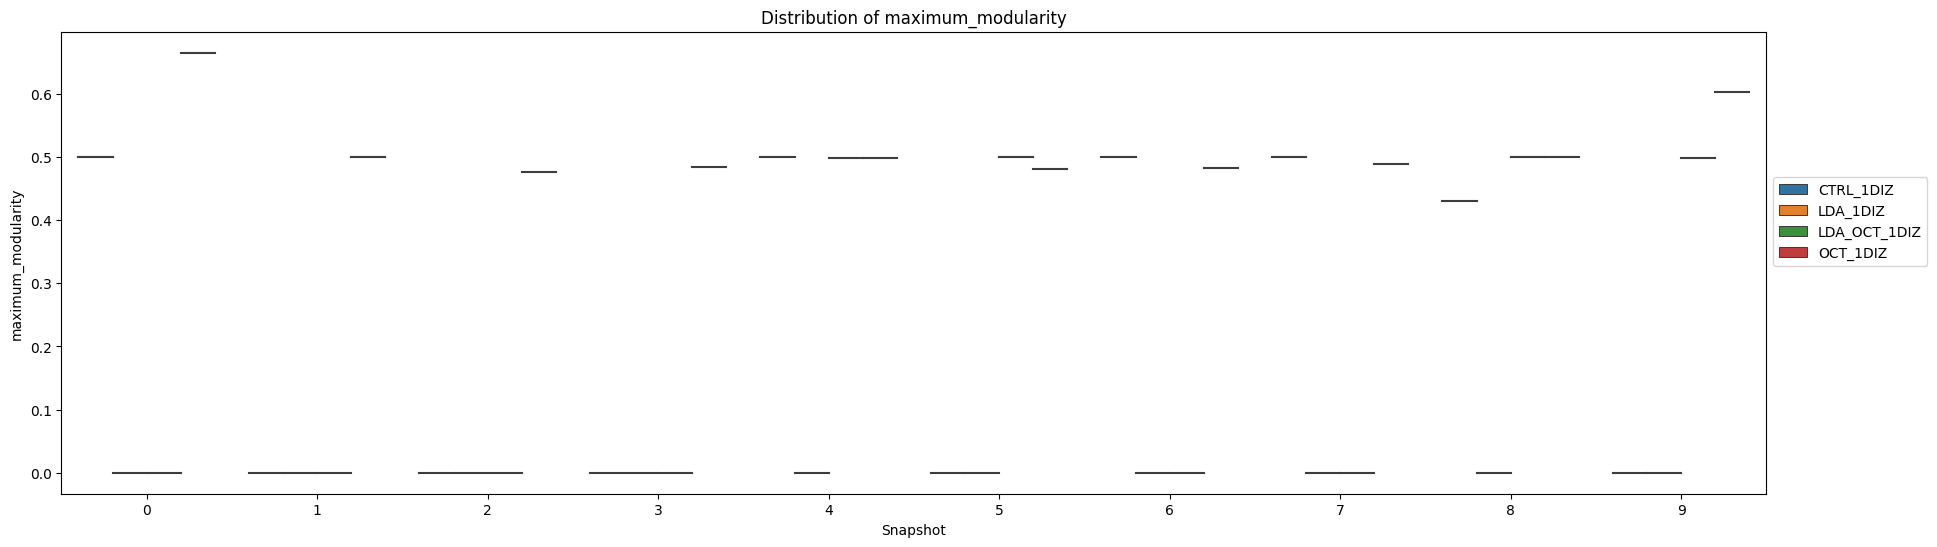

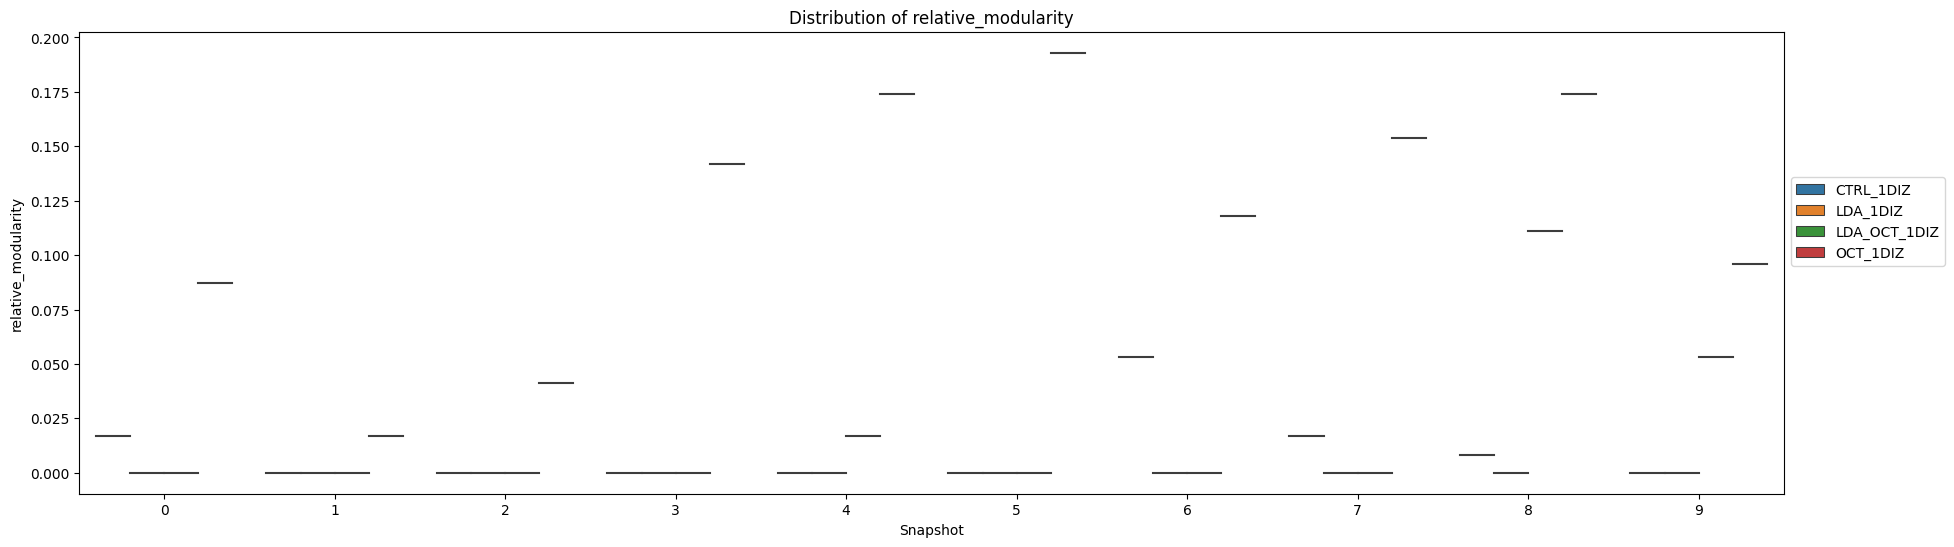

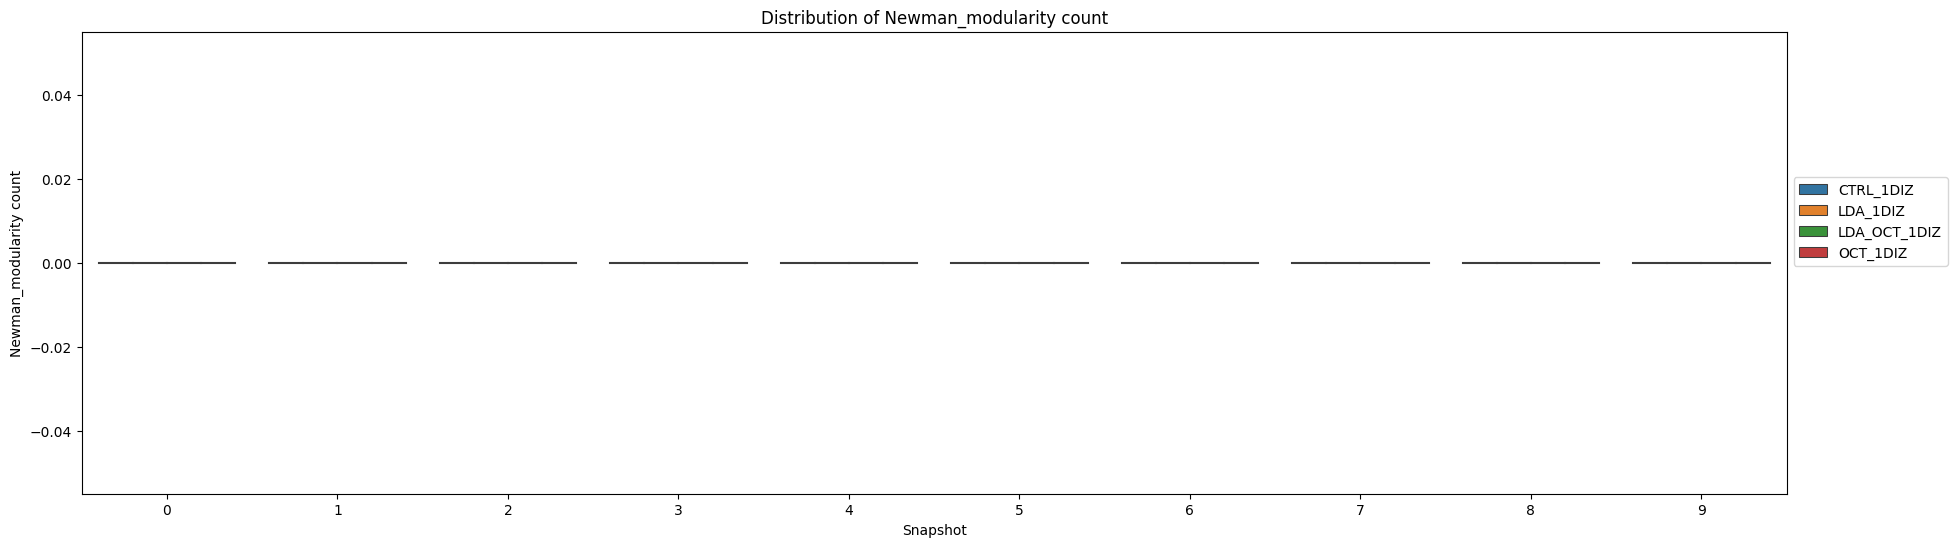

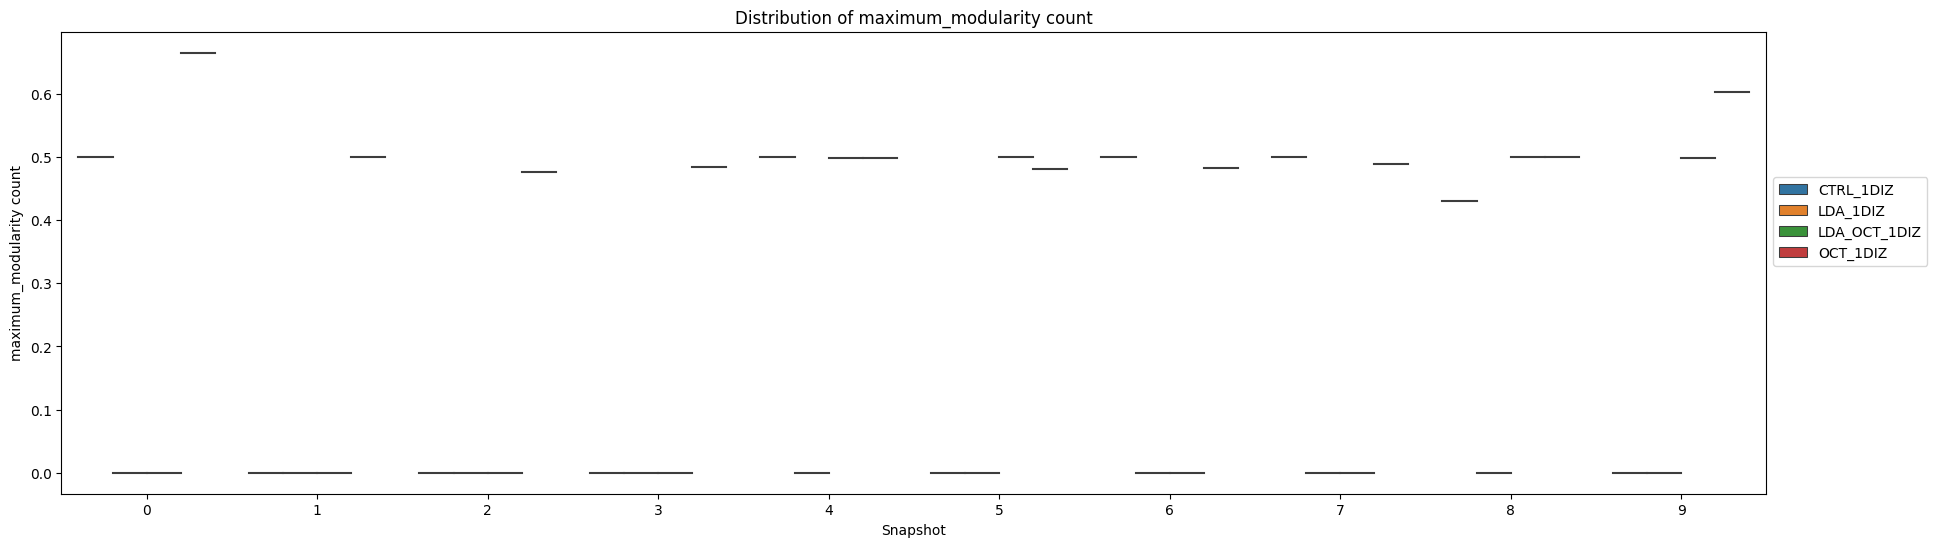

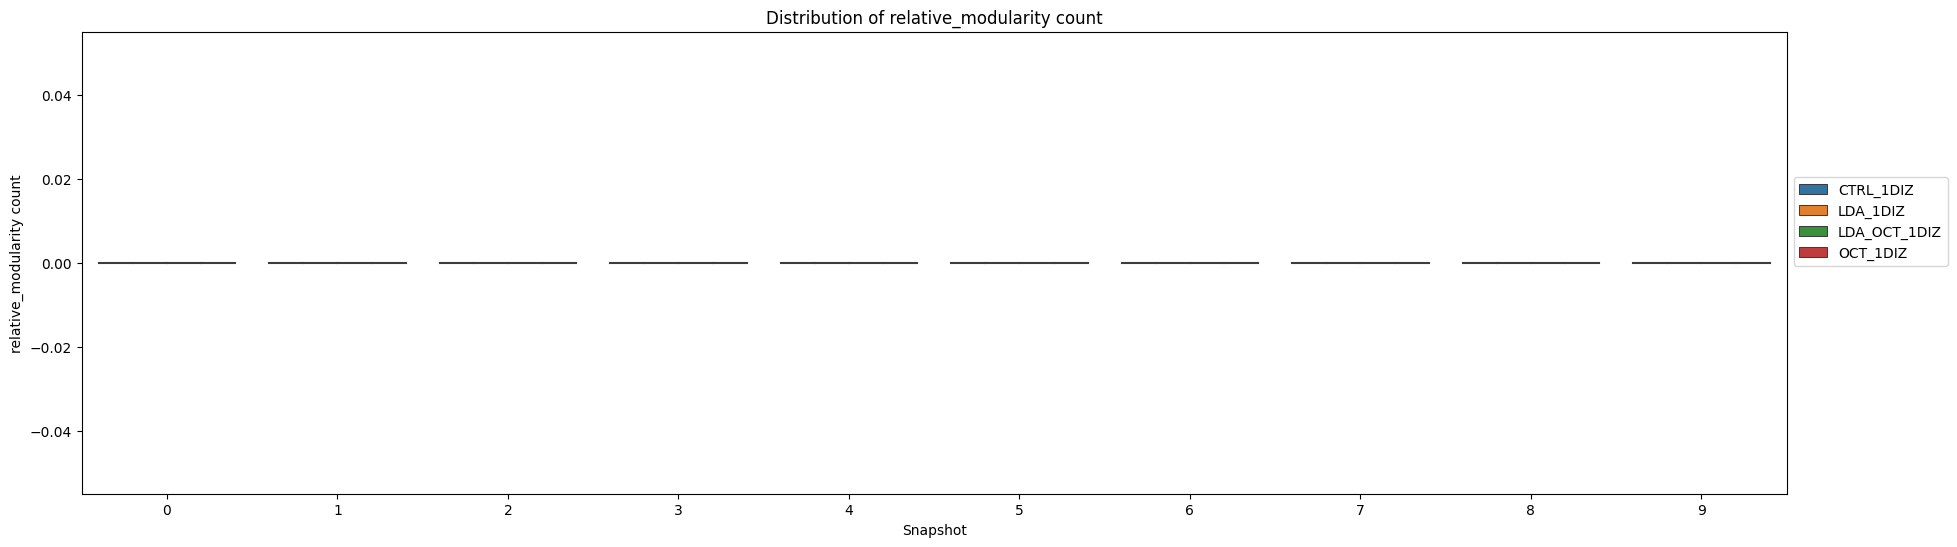

In [3]:
combined_data_reset = combined_data.reset_index()
for measure_name in combined_data.columns:
    plt.figure(figsize=(22, 6))
    sns.violinplot(data=combined_data_reset, x="Snapshot", y=measure_name, hue="Treatment")
    plt.xlabel("Snapshot")
    plt.ylabel(measure_name)
    plt.title(f'Distribution of {measure_name}')
    plt.legend(bbox_to_anchor=(1.0, 0.7), loc='upper left')
    plt.show()